In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
path_to_dataset = "../datasets/FinalBalancedDataset.csv"
df = pd.read_csv(path_to_dataset)
df = df.sample(frac=0.5, random_state=42) 


content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]
df = df[df[class_lbl] != 2]
def preprocess(text):
    return word_tokenize(text.lower())
    
df[content_lbl] = df[content_lbl].apply(preprocess)
# Розділення на тренувальну та тестову вибірки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Побудова словника
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}
vocab_size = len(vocab) + 1  # +1 для padding

# Кодування твітів
def encode_tweet(tweet):
    return [word_to_idx[word] for word in tweet if word in word_to_idx]

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

# Додавання padding
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 100
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

# Кодування міток
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# Створення датасетів та DataLoader
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

train_dataset = HateSpeechDataset(X_train, y_train)
test_dataset = HateSpeechDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# CNN

Using device: cuda


Epoch 1/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:01<00:00, 139.47batch/s]



Epoch 1/10
Train Loss: 0.7302 | Train Acc: 0.5499 | Train F1: 0.5375
Val Loss: 0.6402 | Val Acc: 0.6377 | Val F1: 0.5442


Epoch 2/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 398.39batch/s]



Epoch 2/10
Train Loss: 0.6683 | Train Acc: 0.5901 | Train F1: 0.5686
Val Loss: 0.6281 | Val Acc: 0.6937 | Val F1: 0.6445


Epoch 3/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 398.41batch/s]



Epoch 3/10
Train Loss: 0.6535 | Train Acc: 0.6042 | Train F1: 0.5827
Val Loss: 0.6067 | Val Acc: 0.6659 | Val F1: 0.5848


Epoch 4/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 396.15batch/s]



Epoch 4/10
Train Loss: 0.6387 | Train Acc: 0.6233 | Train F1: 0.6059
Val Loss: 0.5826 | Val Acc: 0.7602 | Val F1: 0.7408


Epoch 5/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 302.47batch/s]



Epoch 5/10
Train Loss: 0.6241 | Train Acc: 0.6404 | Train F1: 0.6265
Val Loss: 0.5610 | Val Acc: 0.7888 | Val F1: 0.7805


Epoch 6/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 377.68batch/s]



Epoch 6/10
Train Loss: 0.6114 | Train Acc: 0.6508 | Train F1: 0.6384
Val Loss: 0.5410 | Val Acc: 0.8001 | Val F1: 0.7938


Epoch 7/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 402.14batch/s]



Epoch 7/10
Train Loss: 0.6056 | Train Acc: 0.6560 | Train F1: 0.6449
Val Loss: 0.5275 | Val Acc: 0.8015 | Val F1: 0.7932


Epoch 8/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 384.92batch/s]



Epoch 8/10
Train Loss: 0.5946 | Train Acc: 0.6712 | Train F1: 0.6605
Val Loss: 0.5123 | Val Acc: 0.8076 | Val F1: 0.7997


Epoch 9/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 306.93batch/s]



Epoch 9/10
Train Loss: 0.5889 | Train Acc: 0.6768 | Train F1: 0.6662
Val Loss: 0.5025 | Val Acc: 0.8106 | Val F1: 0.8028


Epoch 10/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 415.90batch/s]



Epoch 10/10
Train Loss: 0.5792 | Train Acc: 0.6852 | Train F1: 0.6747
Val Loss: 0.4923 | Val Acc: 0.8147 | Val F1: 0.8084

Test Loss: 0.4902 | Test Acc: 0.8200 | Test F1: 0.8138


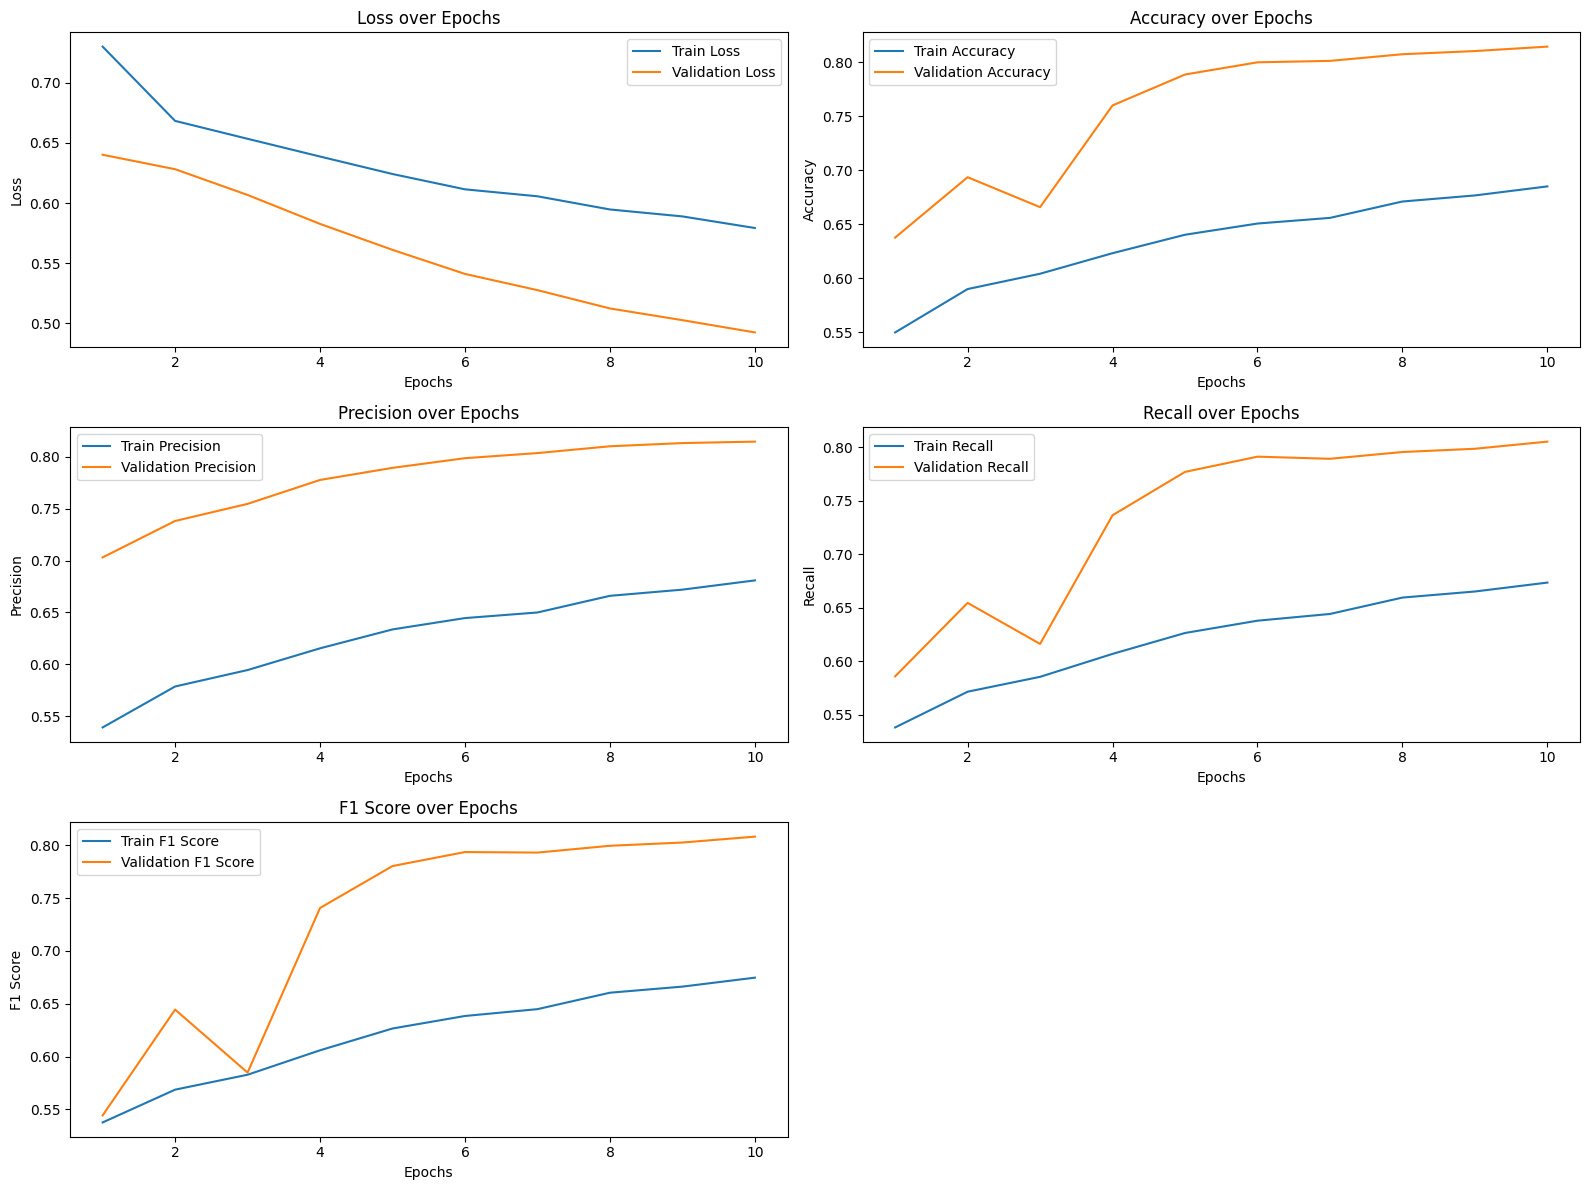

In [10]:
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load and preprocess the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)
df = df.sample(frac=0.6, random_state=42)  # Use 60% of the data for training

content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]
df = df[df[class_lbl] != 2]  # Assuming '2' is an irrelevant class

def preprocess(text):
    return word_tokenize(text.lower())

df[content_lbl] = df[content_lbl].apply(preprocess)

# Introduce label noise to 5% of the training data
def add_label_noise(labels, noise_level=0.05):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification with labels 0 and 1
    return noisy_labels

# Split into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[class_lbl])

# Further split training data into training and validation sets (75% train, 25% val)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# This results in 60% * 0.75 = 45% training, 60% * 0.25 = 15% validation, 20% test

# Build vocabulary from training data
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}  # Start indexing from 1
vocab_size = len(vocab) + 1  # +1 for padding (0)

# Encode tweets
def encode_tweet(tweet):
    return [word_to_idx.get(word, 0) for word in tweet]  # Unknown words mapped to 0

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
val_df[content_lbl] = val_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

# Add padding
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 100
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_val = pad_sequences(val_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_val = le.transform(val_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# Introduce label noise to the training labels
y_train_noisy = add_label_noise(y_train, noise_level=0.05)  # 5% label noise

# Create PyTorch Datasets and DataLoaders
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

train_dataset = HateSpeechDataset(X_train, y_train_noisy)
val_dataset = HateSpeechDataset(X_val, y_val)
test_dataset = HateSpeechDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

# Define the CNN model with reduced complexity
class MinimalCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(MinimalCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.conv = nn.Conv2d(1, 20, (3, embed_dim))  # Reduced filters to 20
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(20, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # (batch_size, max_len, embed_dim)
        x = x.unsqueeze(1)  # (batch_size, 1, max_len, embed_dim)
        x = F.relu(self.conv(x)).squeeze(3)  # (batch_size, num_filters, max_len - kernel_size +1)
        x = F.max_pool1d(x, x.size(2)).squeeze(2)  # (batch_size, num_filters)
        x = self.dropout(x)
        logits = self.fc(x)
        return logits

# Initialize model, loss function, and optimizer
embed_dim = 32  # Reduced embedding dimension
num_classes = len(le.classes_)

model = MinimalCNN(vocab_size, embed_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Changed optimizer to SGD, increased learning rate

# Training loop with progress bar and metric tracking
num_epochs = 10

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.detach().cpu().numpy())
            pbar.update(1)
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    train_accuracies.append(epoch_acc)
    train_precisions.append(epoch_precision)
    train_recalls.append(epoch_recall)
    train_f1s.append(epoch_f1)

    # Validation
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(val_dataset)
    val_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    val_accuracies.append(epoch_acc)
    val_precisions.append(epoch_precision)
    val_recalls.append(epoch_recall)
    val_f1s.append(epoch_f1)

    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | Train F1: {train_f1s[-1]:.4f}')
    print(f'Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f} | Val F1: {val_f1s[-1]:.4f}')

# Testing
model.eval()
running_loss = 0.0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
test_loss = running_loss / len(test_dataset)
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
test_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
test_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} | Test F1: {test_f1:.4f}')

# Plotting loss and performance metrics
epochs = range(1, num_epochs+1)

plt.figure(figsize=(16, 12))

# Loss Plot
plt.subplot(3, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(3, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Precision Plot
plt.subplot(3, 2, 3)
plt.plot(epochs, train_precisions, label='Train Precision')
plt.plot(epochs, val_precisions, label='Validation Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall Plot
plt.subplot(3, 2, 4)
plt.plot(epochs, train_recalls, label='Train Recall')
plt.plot(epochs, val_recalls, label='Validation Recall')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1 Score Plot
plt.subplot(3, 2, 5)
plt.plot(epochs, train_f1s, label='Train F1 Score')
plt.plot(epochs, val_f1s, label='Validation F1 Score')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


Epoch 1/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:01<00:00, 153.84batch/s]



Epoch 1/10
Train Loss: 0.7302 | Train Acc: 0.5499 | Train F1: 0.5376
Val Loss: 0.6402 | Val Acc: 0.6376 | Val F1: 0.5439


Epoch 2/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 401.59batch/s]



Epoch 2/10
Train Loss: 0.6683 | Train Acc: 0.5901 | Train F1: 0.5686
Val Loss: 0.6281 | Val Acc: 0.6935 | Val F1: 0.6442


Epoch 3/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 435.77batch/s]



Epoch 3/10
Train Loss: 0.6535 | Train Acc: 0.6045 | Train F1: 0.5830
Val Loss: 0.6067 | Val Acc: 0.6659 | Val F1: 0.5846


Epoch 4/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 437.84batch/s]



Epoch 4/10
Train Loss: 0.6387 | Train Acc: 0.6233 | Train F1: 0.6059
Val Loss: 0.5827 | Val Acc: 0.7601 | Val F1: 0.7406


Epoch 5/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 328.88batch/s]



Epoch 5/10
Train Loss: 0.6242 | Train Acc: 0.6403 | Train F1: 0.6265
Val Loss: 0.5611 | Val Acc: 0.7888 | Val F1: 0.7805


Epoch 6/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 406.83batch/s]



Epoch 6/10
Train Loss: 0.6114 | Train Acc: 0.6507 | Train F1: 0.6383
Val Loss: 0.5411 | Val Acc: 0.8001 | Val F1: 0.7938


Epoch 7/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 413.85batch/s]



Epoch 7/10
Train Loss: 0.6056 | Train Acc: 0.6560 | Train F1: 0.6449
Val Loss: 0.5276 | Val Acc: 0.8018 | Val F1: 0.7936


Epoch 8/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 454.70batch/s]



Epoch 8/10
Train Loss: 0.5946 | Train Acc: 0.6711 | Train F1: 0.6604
Val Loss: 0.5123 | Val Acc: 0.8075 | Val F1: 0.7995


Epoch 9/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 395.44batch/s]



Epoch 9/10
Train Loss: 0.5889 | Train Acc: 0.6766 | Train F1: 0.6660
Val Loss: 0.5025 | Val Acc: 0.8107 | Val F1: 0.8029


Epoch 10/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 338.36batch/s]



Epoch 10/10
Train Loss: 0.5792 | Train Acc: 0.6854 | Train F1: 0.6750
Val Loss: 0.4923 | Val Acc: 0.8150 | Val F1: 0.8086

Test Loss: 0.4902 | Test Acc: 0.8198 | Test F1: 0.8137


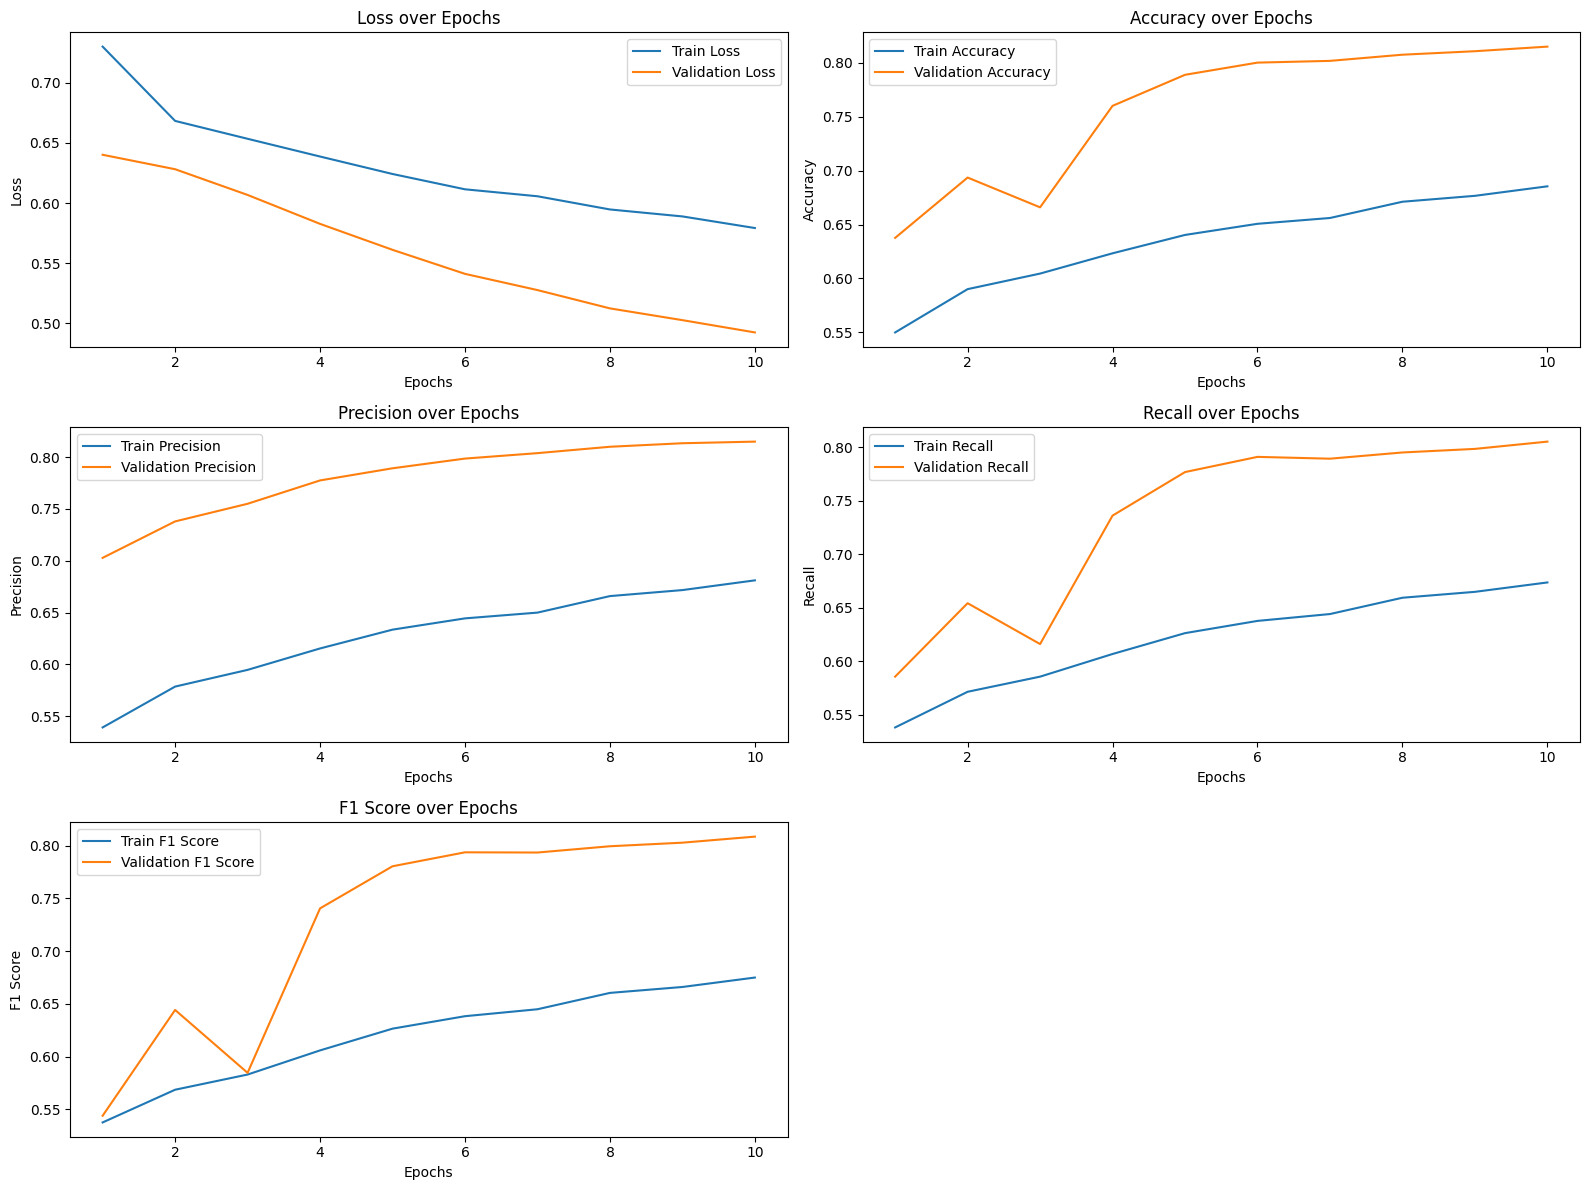

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import random
import nltk

# Ensure NLTK tokenizer data is downloaded
nltk.download('punkt')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load and preprocess the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)
df = df.sample(frac=0.6, random_state=42)  # Use 60% of the data for training

content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]
df = df[df[class_lbl] != 2]  # Assuming '2' is an irrelevant class

def preprocess(text):
    return word_tokenize(text.lower())

df[content_lbl] = df[content_lbl].apply(preprocess)

# Introduce label noise to 5% of the training data
def add_label_noise(labels, noise_level=0.05):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification with labels 0 and 1
    return noisy_labels

# Split into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[class_lbl])

# Further split training data into training and validation sets (75% train, 25% val)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# This results in 60% * 0.75 = 45% training, 60% * 0.25 = 15% validation, 20% test

# Build vocabulary from training data
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}  # Start indexing from 1
vocab_size = len(vocab) + 1  # +1 for padding (0)

# Encode tweets
def encode_tweet(tweet):
    return [word_to_idx.get(word, 0) for word in tweet]  # Unknown words mapped to 0

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
val_df[content_lbl] = val_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

# Add padding
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 80  # Reduced max length
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_val = pad_sequences(val_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_val = le.transform(val_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# Introduce label noise to the training labels
y_train_noisy = add_label_noise(y_train, noise_level=0.05)  # 5% label noise

# Create PyTorch Datasets and DataLoaders
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

train_dataset = HateSpeechDataset(X_train, y_train_noisy)
val_dataset = HateSpeechDataset(X_val, y_val)
test_dataset = HateSpeechDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

# Define the CNN model with reduced complexity
class MinimalCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(MinimalCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.conv = nn.Conv2d(1, 20, (3, embed_dim))  # Reduced filters to 20
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(20, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # (batch_size, max_len, embed_dim)
        x = x.unsqueeze(1)  # (batch_size, 1, max_len, embed_dim)
        x = F.relu(self.conv(x)).squeeze(3)  # (batch_size, num_filters, max_len - kernel_size +1)
        x = F.max_pool1d(x, x.size(2)).squeeze(2)  # (batch_size, num_filters)
        x = self.dropout(x)
        logits = self.fc(x)
        return logits

# Initialize model, loss function, and optimizer
embed_dim = 32  # Reduced embedding dimension
num_classes = len(le.classes_)

model = MinimalCNN(vocab_size, embed_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Changed optimizer to SGD, increased learning rate

# Training loop with progress bar and metric tracking
num_epochs = 10

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.detach().cpu().numpy())
            pbar.update(1)
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    train_accuracies.append(epoch_acc)
    train_precisions.append(epoch_precision)
    train_recalls.append(epoch_recall)
    train_f1s.append(epoch_f1)

    # Validation
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(val_dataset)
    val_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    val_accuracies.append(epoch_acc)
    val_precisions.append(epoch_precision)
    val_recalls.append(epoch_recall)
    val_f1s.append(epoch_f1)

    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | Train F1: {train_f1s[-1]:.4f}')
    print(f'Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f} | Val F1: {val_f1s[-1]:.4f}')

# Testing
model.eval()
running_loss = 0.0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
test_loss = running_loss / len(test_dataset)
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
test_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
test_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} | Test F1: {test_f1:.4f}')

# Plotting loss and performance metrics
epochs = range(1, num_epochs+1)

plt.figure(figsize=(16, 12))

# Loss Plot
plt.subplot(3, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(3, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Precision Plot
plt.subplot(3, 2, 3)
plt.plot(epochs, train_precisions, label='Train Precision')
plt.plot(epochs, val_precisions, label='Validation Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall Plot
plt.subplot(3, 2, 4)
plt.plot(epochs, train_recalls, label='Train Recall')
plt.plot(epochs, val_recalls, label='Validation Recall')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1 Score Plot
plt.subplot(3, 2, 5)
plt.plot(epochs, train_f1s, label='Train F1 Score')
plt.plot(epochs, val_f1s, label='Validation F1 Score')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


Epoch 1/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 175.13batch/s]



Epoch 1/10
Train Loss: 0.8388 | Train Acc: 0.5569 | Train F1: 0.5413
Val Loss: 0.5994 | Val Acc: 0.6955 | Val F1: 0.6323


Epoch 2/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 315.80batch/s]



Epoch 2/10
Train Loss: 0.6308 | Train Acc: 0.6259 | Train F1: 0.6101
Val Loss: 0.5288 | Val Acc: 0.8067 | Val F1: 0.7943


Epoch 3/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 321.99batch/s]



Epoch 3/10
Train Loss: 0.5887 | Train Acc: 0.6716 | Train F1: 0.6592
Val Loss: 0.4655 | Val Acc: 0.8363 | Val F1: 0.8305


Epoch 4/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 277.25batch/s]



Epoch 4/10
Train Loss: 0.5479 | Train Acc: 0.7101 | Train F1: 0.7000
Val Loss: 0.4144 | Val Acc: 0.8435 | Val F1: 0.8383


Epoch 5/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 316.70batch/s]



Epoch 5/10
Train Loss: 0.5111 | Train Acc: 0.7453 | Train F1: 0.7361
Val Loss: 0.3882 | Val Acc: 0.8553 | Val F1: 0.8506


Epoch 6/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 315.25batch/s]



Epoch 6/10
Train Loss: 0.4845 | Train Acc: 0.7686 | Train F1: 0.7596
Val Loss: 0.3695 | Val Acc: 0.8676 | Val F1: 0.8641


Epoch 7/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 307.85batch/s]



Epoch 7/10
Train Loss: 0.4728 | Train Acc: 0.7828 | Train F1: 0.7739
Val Loss: 0.3527 | Val Acc: 0.8755 | Val F1: 0.8720


Epoch 8/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 328.31batch/s]



Epoch 8/10
Train Loss: 0.4533 | Train Acc: 0.8051 | Train F1: 0.7970
Val Loss: 0.3346 | Val Acc: 0.8819 | Val F1: 0.8780


Epoch 9/10: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 340.66batch/s]



Epoch 9/10
Train Loss: 0.4316 | Train Acc: 0.8153 | Train F1: 0.8065
Val Loss: 0.3132 | Val Acc: 0.8921 | Val F1: 0.8886


Epoch 10/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 332.01batch/s]



Epoch 10/10
Train Loss: 0.4153 | Train Acc: 0.8320 | Train F1: 0.8236
Val Loss: 0.2930 | Val Acc: 0.8994 | Val F1: 0.8955

Test Loss: 0.2923 | Test Acc: 0.8968 | Test F1: 0.8932


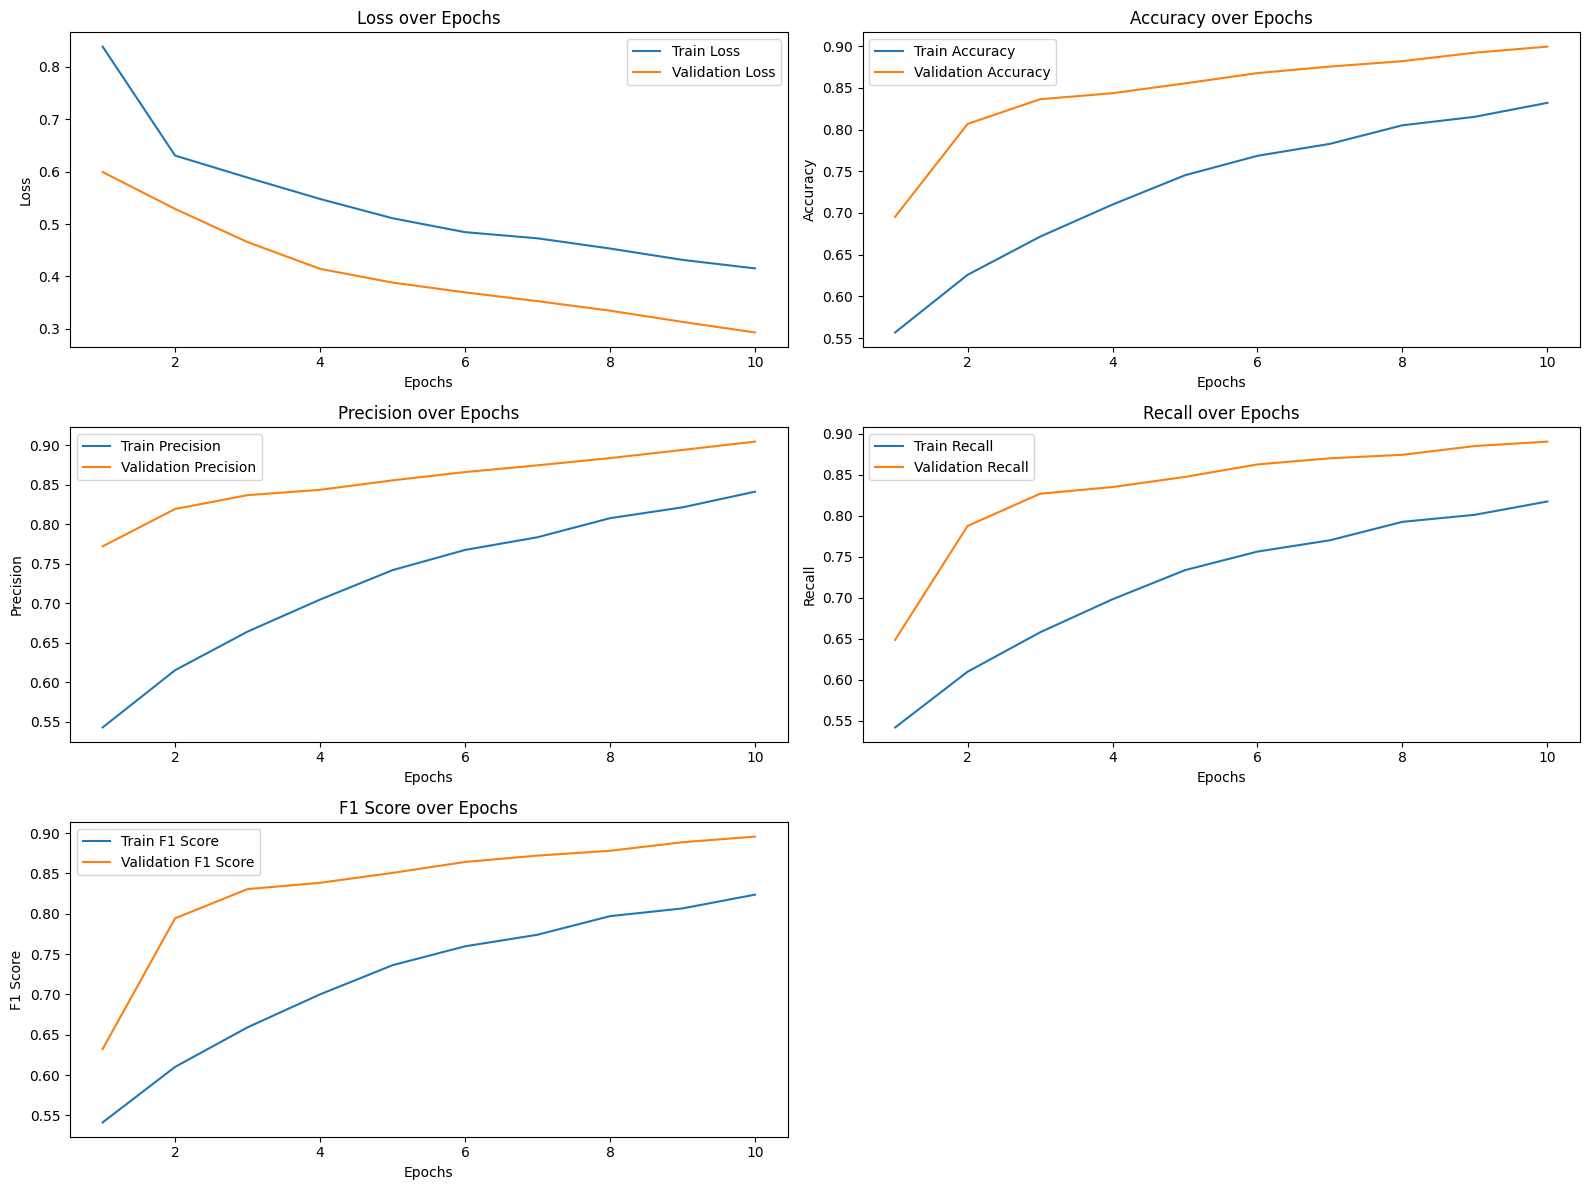

In [94]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import random
import nltk

# Ensure NLTK tokenizer data is downloaded
nltk.download('punkt')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load and preprocess the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)
df = df.sample(frac=0.45, random_state=42)  # Use 45% of the data for training

content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]
df = df[df[class_lbl] != 2]  # Assuming '2' is an irrelevant class

def preprocess(text):
    return word_tokenize(text.lower())

df[content_lbl] = df[content_lbl].apply(preprocess)

# Introduce label noise to 2% of the training data
def add_label_noise(labels, noise_level=0.02):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    if n_samples == 0:
        return noisy_labels
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification with labels 0 and 1
    return noisy_labels

# Split into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[class_lbl])

# Further split training data into training and validation sets (75% train, 25% val)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# This results in 45% training, 15% validation, 20% test

# Build vocabulary from training data
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}  # Start indexing from 1
vocab_size = len(vocab) + 1  # +1 for padding (0)

# Encode tweets
def encode_tweet(tweet):
    return [word_to_idx.get(word, 0) for word in tweet]  # Unknown words mapped to 0

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
val_df[content_lbl] = val_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

# Add padding
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 100
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_val = pad_sequences(val_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_val = le.transform(val_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# Introduce label noise to the training labels
y_train_noisy = add_label_noise(y_train, noise_level=0.02)  # 2% label noise

# Create PyTorch Datasets and DataLoaders
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

train_dataset = HateSpeechDataset(X_train, y_train_noisy)
val_dataset = HateSpeechDataset(X_val, y_val)
test_dataset = HateSpeechDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

# Define the Enhanced CNN model with increased complexity
class EnhancedCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(EnhancedCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.convs = nn.ModuleList([
            nn.Conv2d(1, 20, (3, embed_dim)),
            nn.Conv2d(1, 20, (4, embed_dim)),
            nn.Conv2d(1, 20, (5, embed_dim))
        ])
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(20 * 3, num_classes)  # 20 filters * 3 kernel sizes

    def forward(self, x):
        x = self.embedding(x)  # (batch_size, max_len, embed_dim)
        x = x.unsqueeze(1)  # (batch_size, 1, max_len, embed_dim)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs]  # List of (batch_size, num_filters, *)
        x = [F.max_pool1d(item, item.size(2)).squeeze(2) for item in x]  # List of (batch_size, num_filters)
        x = torch.cat(x, 1)  # (batch_size, num_filters_total)
        x = self.dropout(x)
        logits = self.fc(x)
        return logits

# Initialize model, loss function, and optimizer
embed_dim = 32  # Increased embedding dimension
num_classes = len(le.classes_)

model = EnhancedCNN(vocab_size, embed_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Switched back to Adam

# Training loop with progress bar and metric tracking
num_epochs = 10

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.detach().cpu().numpy())
            pbar.update(1)
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    train_accuracies.append(epoch_acc)
    train_precisions.append(epoch_precision)
    train_recalls.append(epoch_recall)
    train_f1s.append(epoch_f1)

    # Validation
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(val_dataset)
    val_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    val_accuracies.append(epoch_acc)
    val_precisions.append(epoch_precision)
    val_recalls.append(epoch_recall)
    val_f1s.append(epoch_f1)

    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | Train F1: {train_f1s[-1]:.4f}')
    print(f'Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f} | Val F1: {val_f1s[-1]:.4f}')

# Testing
model.eval()
running_loss = 0.0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
test_loss = running_loss / len(test_dataset)
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
test_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
test_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} | Test F1: {test_f1:.4f}')

# Plotting loss and performance metrics
epochs_range = range(1, num_epochs+1)

plt.figure(figsize=(16, 12))

# Loss Plot
plt.subplot(3, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(3, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Precision Plot
plt.subplot(3, 2, 3)
plt.plot(epochs_range, train_precisions, label='Train Precision')
plt.plot(epochs_range, val_precisions, label='Validation Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall Plot
plt.subplot(3, 2, 4)
plt.plot(epochs_range, train_recalls, label='Train Recall')
plt.plot(epochs_range, val_recalls, label='Validation Recall')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1 Score Plot
plt.subplot(3, 2, 5)
plt.plot(epochs_range, train_f1s, label='Train F1 Score')
plt.plot(epochs_range, val_f1s, label='Validation F1 Score')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [97]:
test_precision

np.float64(0.9001077446159135)

In [98]:
test_recall

np.float64(0.8889650720557949)

# LSTM

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import random
import nltk

# Ensure NLTK tokenizer data is downloaded
nltk.download('punkt')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# Use 30% of the data for training
df = df.sample(frac=0.30, random_state=42)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Tokenize the tweets
def preprocess(text):
    return word_tokenize(text.lower())

df[content_lbl] = df[content_lbl].apply(preprocess)

In [40]:
# Introduce label noise to 10% of the training data
def add_label_noise(labels, noise_level=0.10):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    if n_samples == 0:
        return noisy_labels
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification with labels 0 and 1
    return noisy_labels

In [41]:
# Split into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df[class_lbl])

# Further split training data into training and validation sets (75% train, 25% val)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# This results in 30% * 0.75 = 22.5% training, 30% * 0.25 = 7.5% validation, 20% test

In [42]:
# Build vocabulary from training data
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}  # Start indexing from 1
vocab_size = len(vocab) + 1  # +1 for padding (0)

In [43]:
# Encode tweets
def encode_tweet(tweet):
    return [word_to_idx.get(word, 0) for word in tweet]  # Unknown words mapped to 0

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
val_df[content_lbl] = val_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

In [44]:
# Add padding
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 80  # Maintained max length
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_val = pad_sequences(val_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

In [45]:
# Encode 
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_val = le.transform(val_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# Introduce label noise to the training labels
y_train_noisy = add_label_noise(y_train, noise_level=0.10)  # 10% label noise

In [46]:
# Create PyTorch Datasets and DataLoaders
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

train_dataset = HateSpeechDataset(X_train, y_train_noisy)
val_dataset = HateSpeechDataset(X_val, y_val)
test_dataset = HateSpeechDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)  # Increased batch size
val_loader = DataLoader(val_dataset, batch_size=512)
test_loader = DataLoader(test_dataset, batch_size=512)

In [47]:
# Define the LSTM model with reduced complexity
class LSTMHateSpeechModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_classes, dropout_rate):
        super(LSTMHateSpeechModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_size, num_layers=1, batch_first=True, dropout=dropout_rate)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        embedded = self.embedding(x)  # (batch_size, max_len, embed_dim)
        lstm_out, (hn, cn) = self.lstm(embedded)  # lstm_out: (batch_size, max_len, hidden_size)
        # Use the last hidden state
        last_hidden = hn[-1]  # (batch_size, hidden_size)
        out = self.dropout(last_hidden)
        logits = self.fc(out)  # (batch_size, num_classes)
        return logits

In [48]:
# Initialize model, loss function, and optimizer
embed_dim = 8  # Reduced embedding dimension
hidden_size = 16  # Reduced hidden size
num_classes = len(le.classes_)
dropout_rate = 0.5  # Increased dropout rate

model = LSTMHateSpeechModel(vocab_size, embed_dim, hidden_size, num_classes, dropout_rate).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)  # Switched to SGD, increased learning rate

/home/and/miniconda3/envs/venv/lib/python3.10/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [49]:
# Training loop with progress bar and metric tracking
num_epochs = 10

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.detach().cpu().numpy())
            pbar.update(1)
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    train_accuracies.append(epoch_acc)
    train_precisions.append(epoch_precision)
    train_recalls.append(epoch_recall)
    train_f1s.append(epoch_f1)

    # Validation
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(val_dataset)
    val_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    val_accuracies.append(epoch_acc)
    val_precisions.append(epoch_precision)
    val_recalls.append(epoch_recall)
    val_f1s.append(epoch_f1)

    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | Train F1: {train_f1s[-1]:.4f}')
    print(f'Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f} | Val F1: {val_f1s[-1]:.4f}')

Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 41.87batch/s]



Epoch 1/10
Train Loss: 0.6928 | Train Acc: 0.5196 | Train F1: 0.4853
Val Loss: 0.6862 | Val Acc: 0.5715 | Val F1: 0.3649


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 60.68batch/s]



Epoch 2/10
Train Loss: 0.6915 | Train Acc: 0.5328 | Train F1: 0.4385
Val Loss: 0.6848 | Val Acc: 0.5712 | Val F1: 0.3642


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 64.58batch/s]



Epoch 3/10
Train Loss: 0.6895 | Train Acc: 0.5446 | Train F1: 0.4180
Val Loss: 0.6842 | Val Acc: 0.5712 | Val F1: 0.3642


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.69batch/s]



Epoch 4/10
Train Loss: 0.6891 | Train Acc: 0.5452 | Train F1: 0.4115
Val Loss: 0.6838 | Val Acc: 0.5709 | Val F1: 0.3634


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 71.81batch/s]



Epoch 5/10
Train Loss: 0.6900 | Train Acc: 0.5467 | Train F1: 0.3909
Val Loss: 0.6838 | Val Acc: 0.5709 | Val F1: 0.3634


Epoch 6/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 181.84batch/s]



Epoch 6/10
Train Loss: 0.6890 | Train Acc: 0.5499 | Train F1: 0.3855
Val Loss: 0.6838 | Val Acc: 0.5709 | Val F1: 0.3634


Epoch 7/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 185.56batch/s]



Epoch 7/10
Train Loss: 0.6886 | Train Acc: 0.5494 | Train F1: 0.3786
Val Loss: 0.6838 | Val Acc: 0.5709 | Val F1: 0.3634


Epoch 8/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 183.98batch/s]



Epoch 8/10
Train Loss: 0.6895 | Train Acc: 0.5473 | Train F1: 0.3761
Val Loss: 0.6837 | Val Acc: 0.5709 | Val F1: 0.3634


Epoch 9/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 181.90batch/s]



Epoch 9/10
Train Loss: 0.6899 | Train Acc: 0.5494 | Train F1: 0.3718
Val Loss: 0.6837 | Val Acc: 0.5709 | Val F1: 0.3634


Epoch 10/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 185.95batch/s]



Epoch 10/10
Train Loss: 0.6890 | Train Acc: 0.5493 | Train F1: 0.3686
Val Loss: 0.6837 | Val Acc: 0.5709 | Val F1: 0.3634


In [50]:
# Testing
model.eval()
running_loss = 0.0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
test_loss = running_loss / len(test_dataset)
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
test_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
test_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} | Test F1: {test_f1:.4f}')


Test Loss: 0.6837 | Test Acc: 0.5709 | Test F1: 0.3634


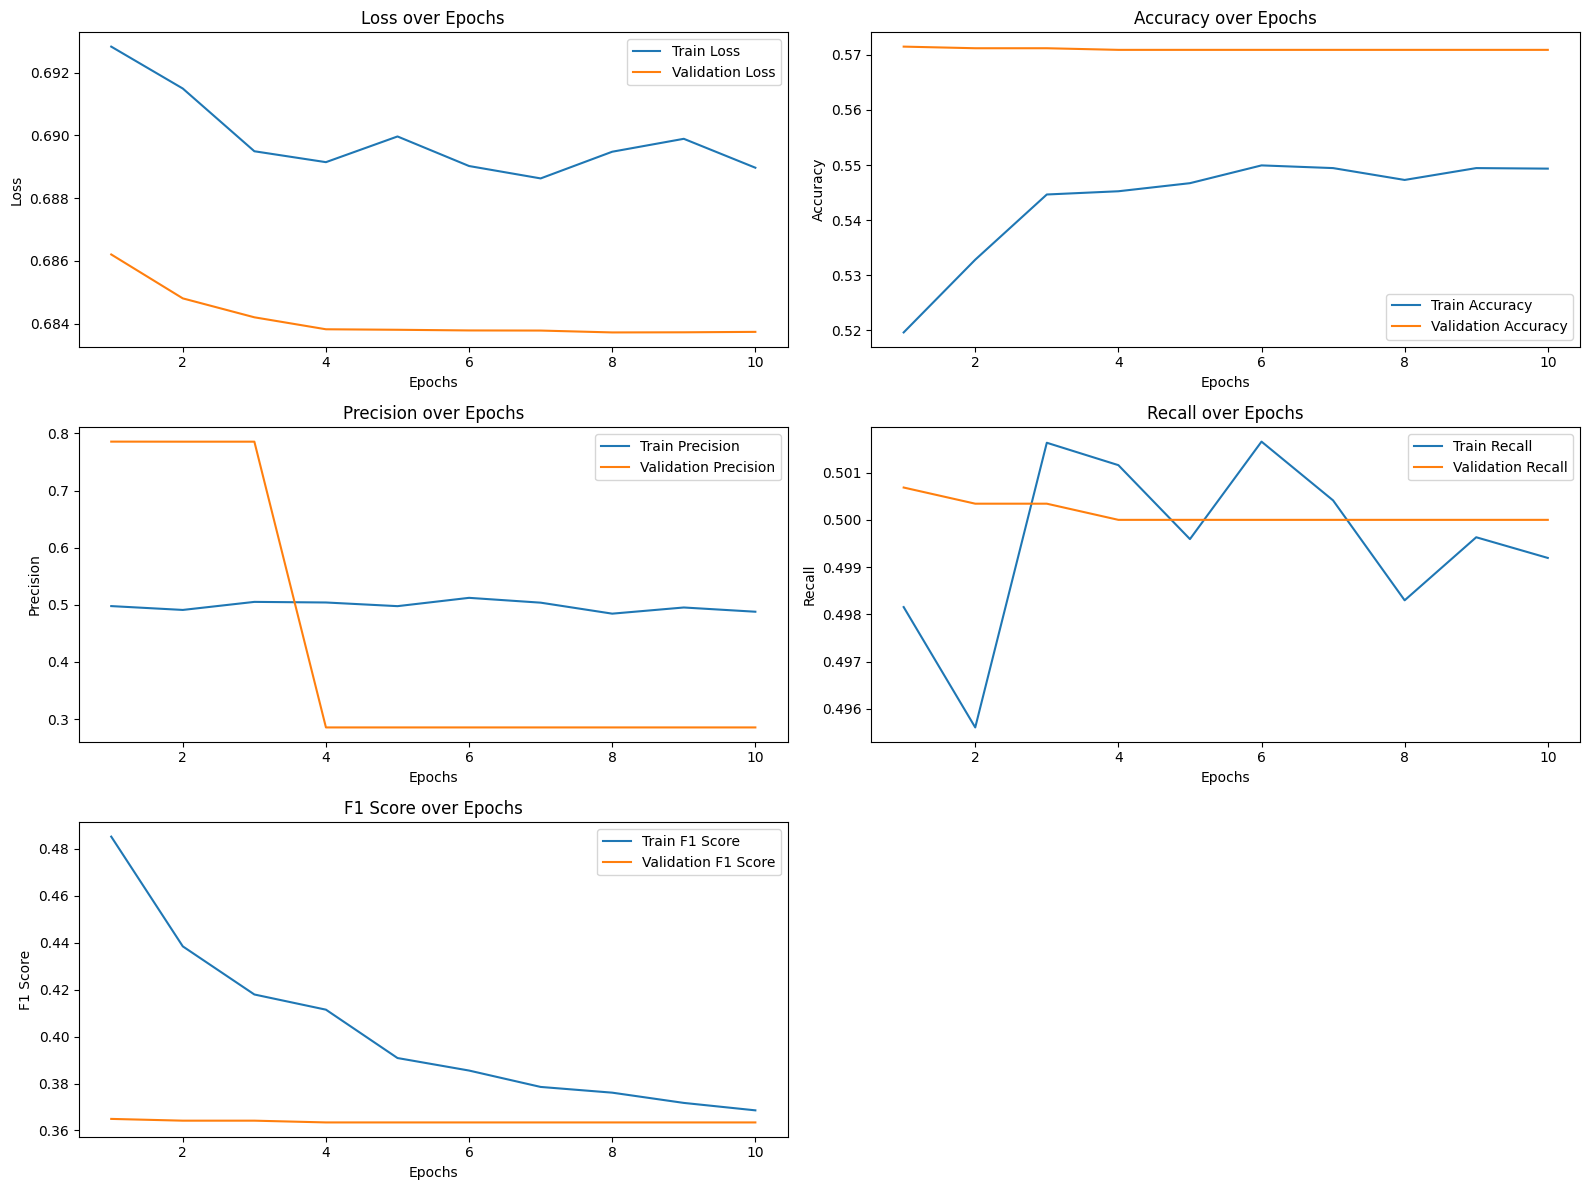

In [51]:
# Plotting loss and performance metrics
epochs_range = range(1, num_epochs+1)

plt.figure(figsize=(16, 12))

# Loss Plot
plt.subplot(3, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(3, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Precision Plot
plt.subplot(3, 2, 3)
plt.plot(epochs_range, train_precisions, label='Train Precision')
plt.plot(epochs_range, val_precisions, label='Validation Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall Plot
plt.subplot(3, 2, 4)
plt.plot(epochs_range, train_recalls, label='Train Recall')
plt.plot(epochs_range, val_recalls, label='Validation Recall')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1 Score Plot
plt.subplot(3, 2, 5)
plt.plot(epochs_range, train_f1s, label='Train F1 Score')
plt.plot(epochs_range, val_f1s, label='Validation F1 Score')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 34.09batch/s]



Epoch 1/10
Train Loss: 0.4918 | Train Acc: 0.7788 | Train F1: 0.7704
Val Loss: 0.3409 | Val Acc: 0.8661 | Val F1: 0.8584


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 40.50batch/s]



Epoch 2/10
Train Loss: 0.3896 | Train Acc: 0.8502 | Train F1: 0.8463
Val Loss: 0.2721 | Val Acc: 0.9004 | Val F1: 0.8978


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 39.55batch/s]



Epoch 3/10
Train Loss: 0.3419 | Train Acc: 0.8756 | Train F1: 0.8725
Val Loss: 0.2583 | Val Acc: 0.9060 | Val F1: 0.9023


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 39.61batch/s]



Epoch 4/10
Train Loss: 0.3066 | Train Acc: 0.8921 | Train F1: 0.8897
Val Loss: 0.2532 | Val Acc: 0.9057 | Val F1: 0.9030


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 39.75batch/s]



Epoch 5/10
Train Loss: 0.2653 | Train Acc: 0.9119 | Train F1: 0.9100
Val Loss: 0.2636 | Val Acc: 0.8960 | Val F1: 0.8932


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 40.06batch/s]



Epoch 6/10
Train Loss: 0.2257 | Train Acc: 0.9276 | Train F1: 0.9262
Val Loss: 0.2937 | Val Acc: 0.8802 | Val F1: 0.8786


Epoch 7/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 40.23batch/s]



Epoch 7/10
Train Loss: 0.1957 | Train Acc: 0.9390 | Train F1: 0.9380
Val Loss: 0.2973 | Val Acc: 0.8860 | Val F1: 0.8845


Epoch 8/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 39.31batch/s]



Epoch 8/10
Train Loss: 0.1957 | Train Acc: 0.9380 | Train F1: 0.9370
Val Loss: 0.2908 | Val Acc: 0.8952 | Val F1: 0.8928


Epoch 9/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 40.32batch/s]



Epoch 9/10
Train Loss: 0.1421 | Train Acc: 0.9600 | Train F1: 0.9594
Val Loss: 0.3607 | Val Acc: 0.8896 | Val F1: 0.8873


Epoch 10/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 40.00batch/s]



Epoch 10/10
Train Loss: 0.1112 | Train Acc: 0.9691 | Train F1: 0.9686
Val Loss: 0.4140 | Val Acc: 0.8617 | Val F1: 0.8608

Test Loss: 0.4095 | Test Acc: 0.8623 | Test F1: 0.8614


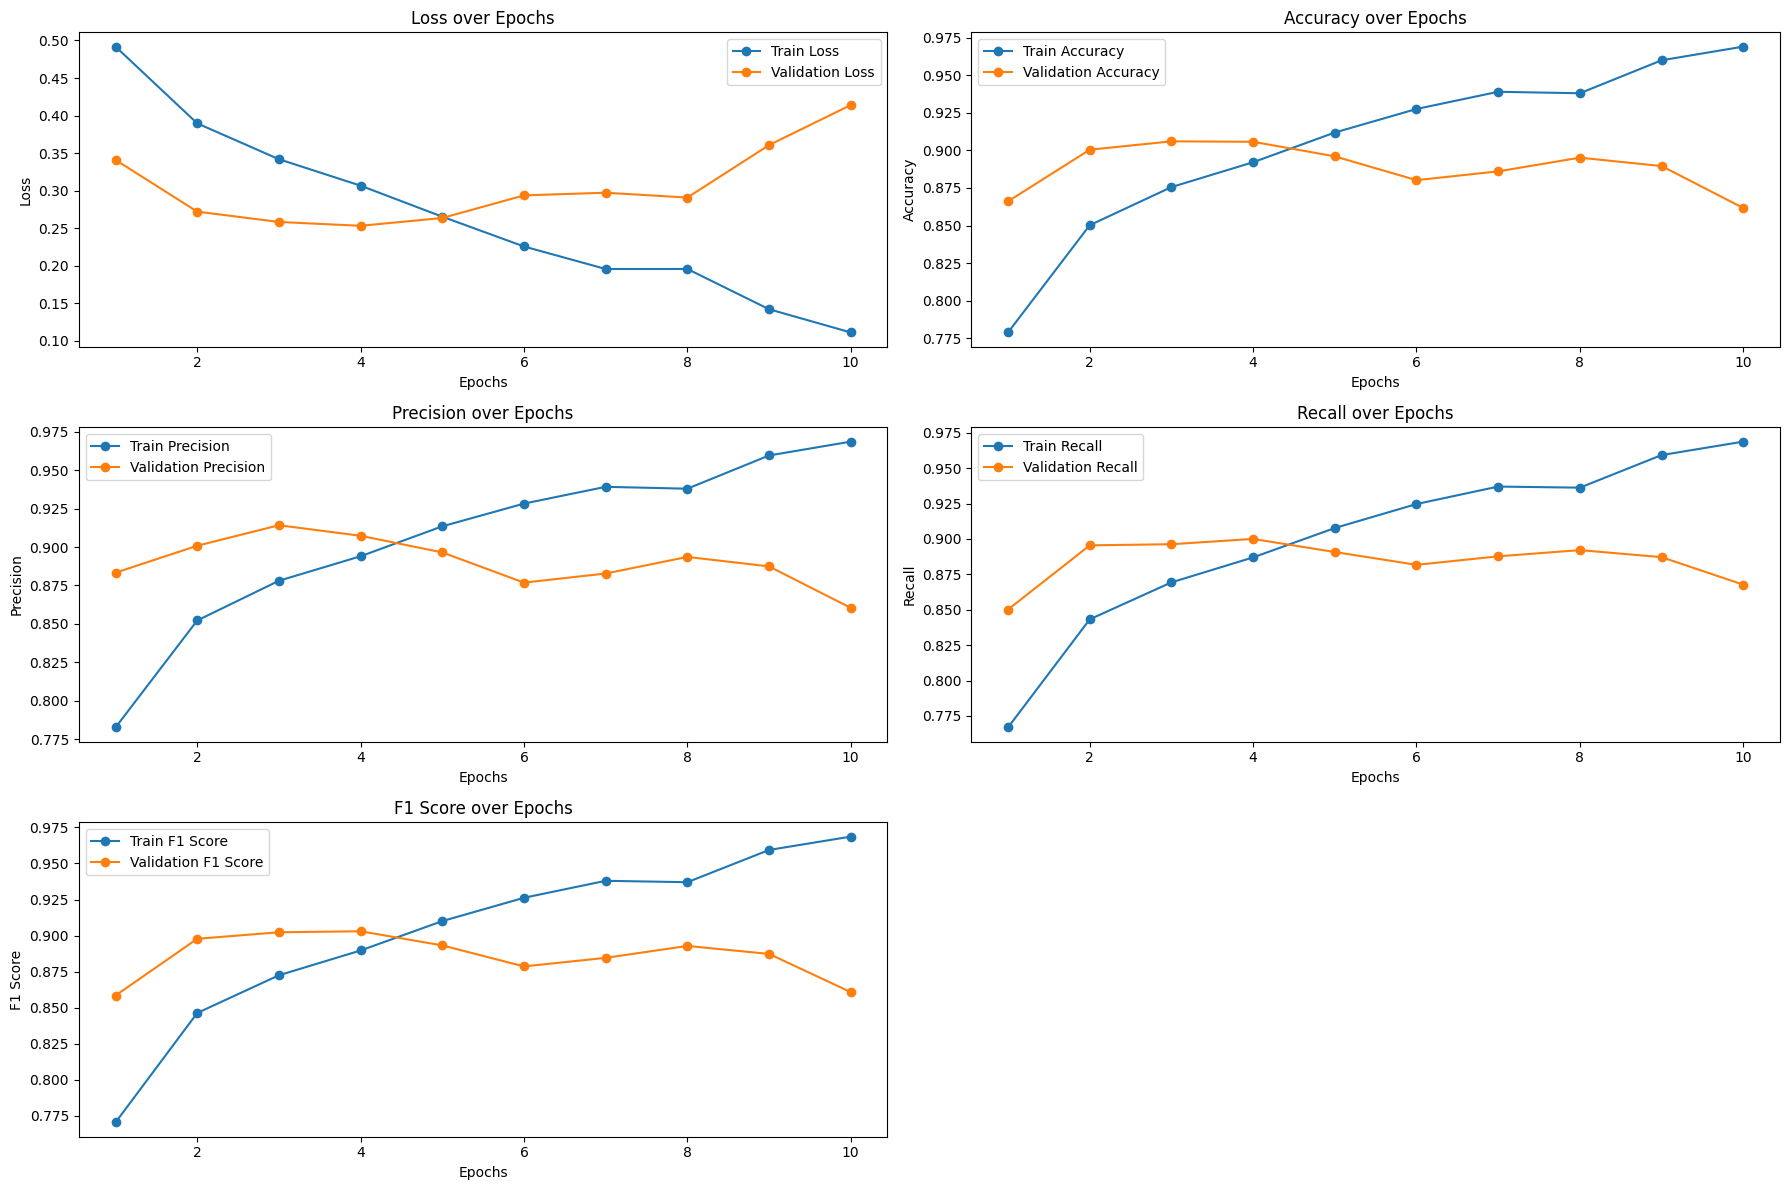

In [58]:
# 📦 **Complete LSTM-Based Hate Speech Detection Model**

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import random
import nltk

# 🛠️ **Setup and Preprocessing**

# Download NLTK data
nltk.download('punkt')

# Set random seeds for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# Use 30% of the data for training to balance computational efficiency and data utilization
df = df.sample(frac=0.30, random_state=42)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Tokenize the tweets
def preprocess(text):
    return word_tokenize(text.lower())

df[content_lbl] = df[content_lbl].apply(preprocess)

# Introduce label noise to 5% of the training data to prevent overfitting
def add_label_noise(labels, noise_level=0.05):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    if n_samples == 0:
        return noisy_labels
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification with labels 0 and 1
    return noisy_labels

# ✂️ **Data Splitting**

# Split into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df[class_lbl])

# Further split training data into training and validation sets (75% train, 25% val)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# Resulting in 22.5% training, 7.5% validation, 20% test

# 📚 **Vocabulary Building**

# Build vocabulary from training data
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}  # Start indexing from 1
vocab_size = len(vocab) + 1  # +1 for padding (0)

# 🔤 **Encoding Tweets**

# Encode tweets by mapping words to indices
def encode_tweet(tweet):
    return [word_to_idx.get(word, 0) for word in tweet]  # Unknown words mapped to 0

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
val_df[content_lbl] = val_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

# 📏 **Padding Sequences**

# Pad sequences to a fixed length
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 80  # Fixed sequence length
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_val = pad_sequences(val_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

# 🏷️ **Encoding Labels**

# Encode labels to numerical format
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_val = le.transform(val_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# Introduce label noise to the training labels
y_train_noisy = add_label_noise(y_train, noise_level=0.05)  # 5% label noise

# 📦 **Dataset and DataLoader**

# Create a custom Dataset class
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Instantiate Datasets
train_dataset = HateSpeechDataset(X_train, y_train_noisy)
val_dataset = HateSpeechDataset(X_val, y_val)
test_dataset = HateSpeechDataset(X_test, y_test)

# Instantiate DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)  # Batch size set to 128
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

# 🧠 **LSTM Model Definition**

# Define the LSTM-based model
class LSTMHateSpeechModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate):
        super(LSTMHateSpeechModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_size, num_layers=num_layers, 
                            batch_first=True, dropout=dropout_rate, bidirectional=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # *2 for bidirectional

    def forward(self, x):
        embedded = self.embedding(x)  # (batch_size, max_len, embed_dim)
        lstm_out, (hn, cn) = self.lstm(embedded)  # lstm_out: (batch_size, max_len, hidden_size*2)
        # Use the last hidden state
        last_hidden = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim=1)  # (batch_size, hidden_size*2)
        out = self.dropout(last_hidden)
        logits = self.fc(out)  # (batch_size, num_classes)
        return logits

# 📐 **Model Initialization**

# Define model parameters
embed_dim = 128  # Increased embedding dimension for better representation
hidden_size = 256  # Increased hidden size for better capacity
num_layers = 2  # 2 LSTM layers
num_classes = len(le.classes_)
dropout_rate = 0.5

# Initialize the model
model = LSTMHateSpeechModel(vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with lr=0.001

# 📈 **Training Loop**

# Initialize metrics storage
num_epochs = 10

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.detach().cpu().numpy())
            pbar.update(1)
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    train_accuracies.append(epoch_acc)
    train_precisions.append(epoch_precision)
    train_recalls.append(epoch_recall)
    train_f1s.append(epoch_f1)

    # Validation Phase
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(val_dataset)
    val_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    val_accuracies.append(epoch_acc)
    val_precisions.append(epoch_precision)
    val_recalls.append(epoch_recall)
    val_f1s.append(epoch_f1)

    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | Train F1: {train_f1s[-1]:.4f}')
    print(f'Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f} | Val F1: {val_f1s[-1]:.4f}')

# 🧪 **Testing the Model**

# Evaluate the model on the test set
model.eval()
running_loss = 0.0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
test_loss = running_loss / len(test_dataset)
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
test_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
test_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} | Test F1: {test_f1:.4f}')

# 📊 **Visualizing Performance**

# Plotting training and validation metrics
epochs_range = range(1, num_epochs+1)

plt.figure(figsize=(18, 12))

# Loss Plot
plt.subplot(3, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, val_losses, label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(3, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Precision Plot
plt.subplot(3, 2, 3)
plt.plot(epochs_range, train_precisions, label='Train Precision', marker='o')
plt.plot(epochs_range, val_precisions, label='Validation Precision', marker='o')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall Plot
plt.subplot(3, 2, 4)
plt.plot(epochs_range, train_recalls, label='Train Recall', marker='o')
plt.plot(epochs_range, val_recalls, label='Validation Recall', marker='o')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1 Score Plot
plt.subplot(3, 2, 5)
plt.plot(epochs_range, train_f1s, label='Train F1 Score', marker='o')
plt.plot(epochs_range, val_f1s, label='Validation F1 Score', marker='o')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
test_precision

np.float64(0.861039017066731)

In [60]:
test_recall

np.float64(0.868318566684412)

# GRU

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 38.05batch/s]



Epoch 1/10
Train Loss: 0.4649 | Train Acc: 0.7982 | Train F1: 0.7928
Val Loss: 0.2945 | Val Acc: 0.8960 | Val F1: 0.8925


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.64batch/s]



Epoch 2/10
Train Loss: 0.3634 | Train Acc: 0.8579 | Train F1: 0.8543
Val Loss: 0.2595 | Val Acc: 0.9048 | Val F1: 0.9017


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 44.79batch/s]



Epoch 3/10
Train Loss: 0.3134 | Train Acc: 0.8811 | Train F1: 0.8783
Val Loss: 0.2601 | Val Acc: 0.9007 | Val F1: 0.8978


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 41.41batch/s]



Epoch 4/10
Train Loss: 0.2722 | Train Acc: 0.9056 | Train F1: 0.9035
Val Loss: 0.2550 | Val Acc: 0.9107 | Val F1: 0.9087


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.18batch/s]



Epoch 5/10
Train Loss: 0.2215 | Train Acc: 0.9249 | Train F1: 0.9235
Val Loss: 0.2715 | Val Acc: 0.8963 | Val F1: 0.8932


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 43.28batch/s]



Epoch 6/10
Train Loss: 0.1659 | Train Acc: 0.9446 | Train F1: 0.9437
Val Loss: 0.2848 | Val Acc: 0.9075 | Val F1: 0.9047


Epoch 7/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.27batch/s]



Epoch 7/10
Train Loss: 0.1127 | Train Acc: 0.9634 | Train F1: 0.9628
Val Loss: 0.3375 | Val Acc: 0.8969 | Val F1: 0.8938


Epoch 8/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 41.81batch/s]



Epoch 8/10
Train Loss: 0.0727 | Train Acc: 0.9765 | Train F1: 0.9762
Val Loss: 0.4311 | Val Acc: 0.8866 | Val F1: 0.8849


Epoch 9/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.27batch/s]



Epoch 9/10
Train Loss: 0.0647 | Train Acc: 0.9787 | Train F1: 0.9783
Val Loss: 0.4188 | Val Acc: 0.8931 | Val F1: 0.8907


Epoch 10/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 41.98batch/s]



Epoch 10/10
Train Loss: 0.0426 | Train Acc: 0.9853 | Train F1: 0.9851
Val Loss: 0.4552 | Val Acc: 0.8963 | Val F1: 0.8944

Test Loss: 0.4636 | Test Acc: 0.8902 | Test Precision: 0.8874 | Test Recall: 0.8889 | Test F1: 0.8881


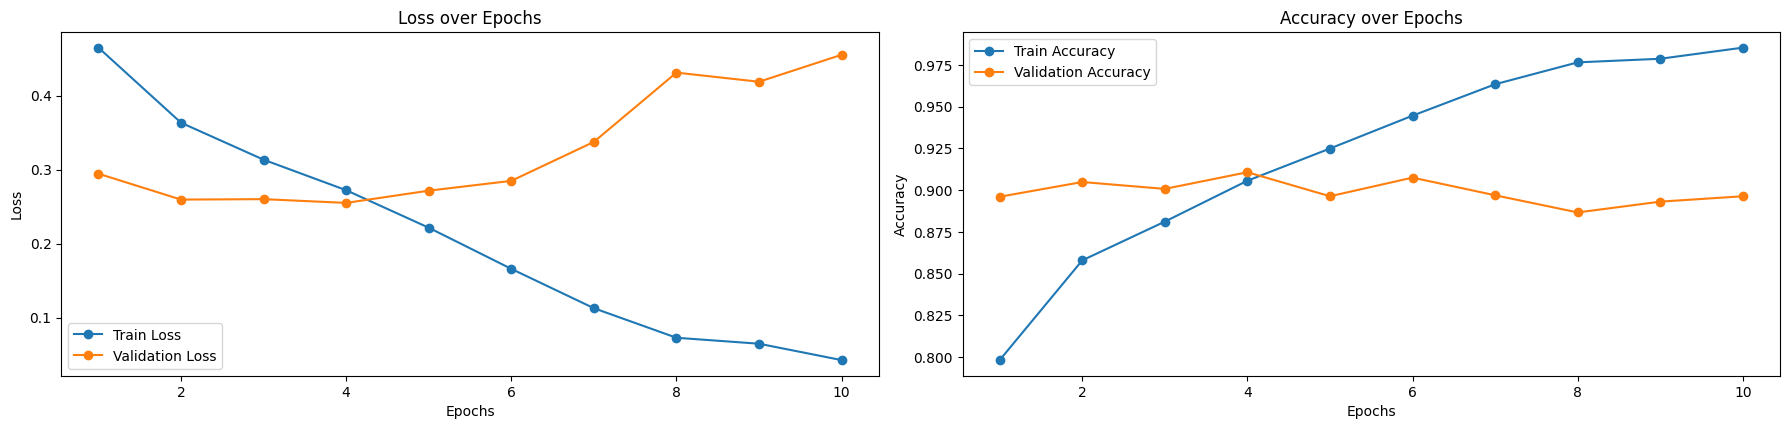

In [62]:
# 🟢 **Complete GRU-Based Hate Speech Detection Model**

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import random
import nltk

# 🛠️ **Setup and Preprocessing**

# Download NLTK data
nltk.download('punkt')

# Set random seeds for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# 📊 **Data Exploration (Optional)**
# Uncomment the following lines to explore your dataset
# print(df.head())
# print(df['Toxicity'].value_counts())

# Use 30% of the data for training to balance computational efficiency and data utilization
df = df.sample(frac=0.30, random_state=42)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Tokenize the tweets
def preprocess(text):
    return word_tokenize(text.lower())

df[content_lbl] = df[content_lbl].apply(preprocess)

# 🔀 **Data Splitting**

# Split into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df[class_lbl])

# Further split training data into training and validation sets (75% train, 25% val)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# Resulting in 22.5% training, 7.5% validation, 20% test

# 🏷️ **Encoding Labels**

# Encode labels to numerical format
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_val = le.transform(val_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# 📚 **Vocabulary Building**

# Build vocabulary from training data
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}  # Start indexing from 1
vocab_size = len(vocab) + 1  # +1 for padding (0)

# 🔤 **Encoding Tweets**

# Encode tweets by mapping words to indices
def encode_tweet(tweet):
    return [word_to_idx.get(word, 0) for word in tweet]  # Unknown words mapped to 0

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
val_df[content_lbl] = val_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

# 📏 **Padding Sequences**

# Pad sequences to a fixed length
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 80  # Fixed sequence length
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_val = pad_sequences(val_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

# 🔄 **Introducing Label Noise (Optional)**
# To prevent overfitting, introduce label noise to a small percentage of the training data
def add_label_noise(labels, noise_level=0.05):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    if n_samples == 0:
        return noisy_labels
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification with labels 0 and 1
    return noisy_labels

# Introduce label noise to the training labels
y_train_noisy = add_label_noise(y_train, noise_level=0.05)  # 5% label noise

# 📦 **Dataset and DataLoader**

# Create a custom Dataset class
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Instantiate Datasets
train_dataset = HateSpeechDataset(X_train, y_train_noisy)
val_dataset = HateSpeechDataset(X_val, y_val)
test_dataset = HateSpeechDataset(X_test, y_test)

# Instantiate DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)  # Batch size set to 128
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

# 🧠 **GRU Model Definition**

# Define the GRU-based model
class GRUHateSpeechModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate):
        super(GRUHateSpeechModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.gru = nn.GRU(embed_dim, hidden_size, num_layers=num_layers, 
                          batch_first=True, dropout=dropout_rate, bidirectional=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # *2 for bidirectional

    def forward(self, x):
        embedded = self.embedding(x)  # (batch_size, max_len, embed_dim)
        gru_out, hn = self.gru(embedded)  # gru_out: (batch_size, max_len, hidden_size*2)
        # Use the last hidden state
        last_hidden = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim=1)  # (batch_size, hidden_size*2)
        out = self.dropout(last_hidden)
        logits = self.fc(out)  # (batch_size, num_classes)
        return logits

# 📐 **Model Initialization**

# Define model parameters
embed_dim = 128  # Increased embedding dimension for better representation
hidden_size = 256  # Increased hidden size for better capacity
num_layers = 2  # 2 GRU layers
num_classes = len(le.classes_)
dropout_rate = 0.3  # Reduced dropout rate to allow more learning

# Initialize the model
model = GRUHateSpeechModel(vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with lr=0.001

# 🏋️ **Training Loop**

# Initialize metrics storage
num_epochs = 10

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.detach().cpu().numpy())
            pbar.update(1)
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    train_accuracies.append(epoch_acc)
    train_precisions.append(epoch_precision)
    train_recalls.append(epoch_recall)
    train_f1s.append(epoch_f1)

    # Validation Phase
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(val_dataset)
    val_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    val_accuracies.append(epoch_acc)
    val_precisions.append(epoch_precision)
    val_recalls.append(epoch_recall)
    val_f1s.append(epoch_f1)

    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | Train F1: {train_f1s[-1]:.4f}')
    print(f'Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f} | Val F1: {val_f1s[-1]:.4f}')

# 🧪 **Testing the Model**

# Evaluate the model on the test set
model.eval()
running_loss = 0.0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
test_loss = running_loss / len(test_dataset)
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
test_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
test_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} | Test Precision: {test_precision:.4f} | Test Recall: {test_recall:.4f} | Test F1: {test_f1:.4f}')


# 📊 **Visualizing Performance**

# Plotting training and validation metrics
epochs_range = range(1, num_epochs+1)

plt.figure(figsize=(18, 12))

# Loss Plot
plt.subplot(3, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, val_losses, label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(3, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 38.16batch/s]



Epoch 1/10
Train Loss: 0.4773 | Train Acc: 0.7894 | Train F1: 0.7835
Val Loss: 0.3098 | Val Acc: 0.8905 | Val F1: 0.8869


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 43.03batch/s]



Epoch 2/10
Train Loss: 0.3788 | Train Acc: 0.8537 | Train F1: 0.8499
Val Loss: 0.2609 | Val Acc: 0.9051 | Val F1: 0.9017


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.74batch/s]



Epoch 3/10
Train Loss: 0.3270 | Train Acc: 0.8777 | Train F1: 0.8747
Val Loss: 0.2537 | Val Acc: 0.9066 | Val F1: 0.9035


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.99batch/s]



Epoch 4/10
Train Loss: 0.2879 | Train Acc: 0.8987 | Train F1: 0.8964
Val Loss: 0.2378 | Val Acc: 0.9078 | Val F1: 0.9056


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 43.47batch/s]



Epoch 5/10
Train Loss: 0.2453 | Train Acc: 0.9179 | Train F1: 0.9163
Val Loss: 0.2515 | Val Acc: 0.9037 | Val F1: 0.9003


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 43.31batch/s]



Epoch 6/10
Train Loss: 0.1926 | Train Acc: 0.9374 | Train F1: 0.9363
Val Loss: 0.2628 | Val Acc: 0.9051 | Val F1: 0.9033


Epoch 7/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.08batch/s]



Epoch 7/10
Train Loss: 0.1580 | Train Acc: 0.9514 | Train F1: 0.9507
Val Loss: 0.2930 | Val Acc: 0.9001 | Val F1: 0.8967


Epoch 8/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.36batch/s]



Epoch 8/10
Train Loss: 0.1188 | Train Acc: 0.9639 | Train F1: 0.9633
Val Loss: 0.3636 | Val Acc: 0.8916 | Val F1: 0.8900


Epoch 9/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 41.94batch/s]



Epoch 9/10
Train Loss: 0.0917 | Train Acc: 0.9716 | Train F1: 0.9712
Val Loss: 0.3535 | Val Acc: 0.9025 | Val F1: 0.8996


Epoch 10/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.66batch/s]



Epoch 10/10
Train Loss: 0.0670 | Train Acc: 0.9785 | Train F1: 0.9782
Val Loss: 0.3987 | Val Acc: 0.8872 | Val F1: 0.8846

Test Loss: 0.4235 | Test Acc: 0.8860 | Test Precision: 0.8845 | Test Recall: 0.8824 | Test F1: 0.8834


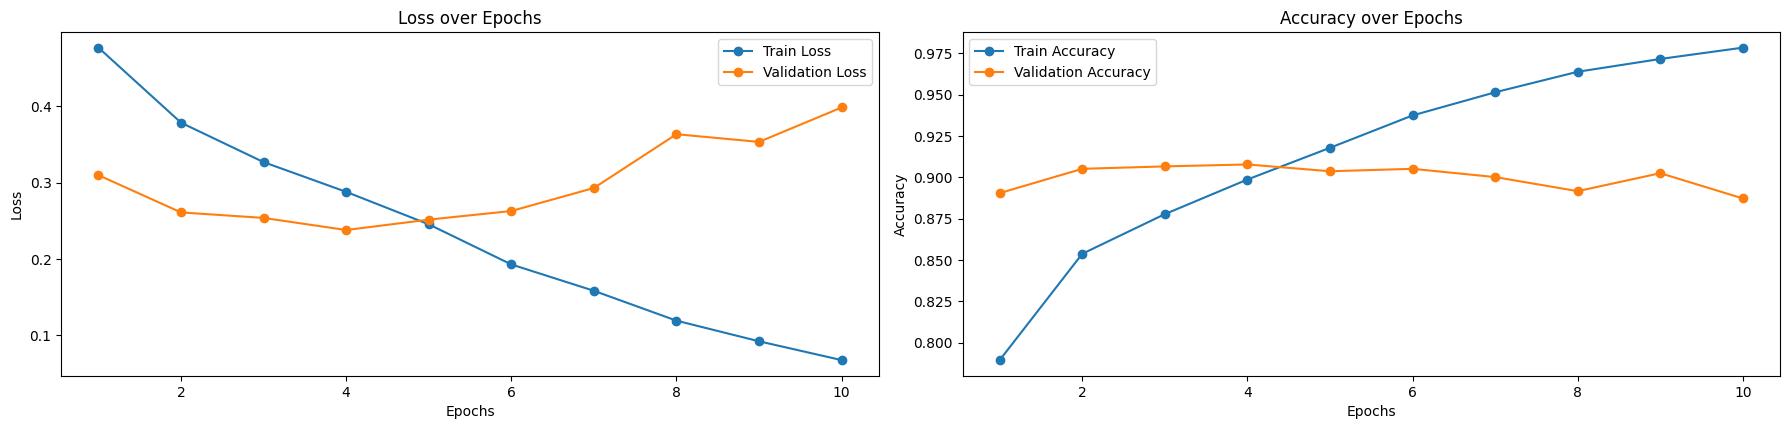

In [63]:
# 🟢 **Complete GRU-Based Hate Speech Detection Model**

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import random
import nltk

# 🛠️ **Setup and Preprocessing**

# Download NLTK data
nltk.download('punkt')

# Set random seeds for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# 📊 **Data Exploration (Optional)**
# Uncomment the following lines to explore your dataset
# print(df.head())
# print(df['Toxicity'].value_counts())

# Use 30% of the data for training to balance computational efficiency and data utilization
df = df.sample(frac=0.30, random_state=42)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Tokenize the tweets
def preprocess(text):
    return word_tokenize(text.lower())

df[content_lbl] = df[content_lbl].apply(preprocess)

# 🔀 **Data Splitting**

# Split into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df[class_lbl])

# Further split training data into training and validation sets (75% train, 25% val)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# Resulting in 22.5% training, 7.5% validation, 20% test

# 🏷️ **Encoding Labels**

# Encode labels to numerical format
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_val = le.transform(val_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# 📚 **Vocabulary Building**

# Build vocabulary from training data
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}  # Start indexing from 1
vocab_size = len(vocab) + 1  # +1 for padding (0)

# 🔤 **Encoding Tweets**

# Encode tweets by mapping words to indices
def encode_tweet(tweet):
    return [word_to_idx.get(word, 0) for word in tweet]  # Unknown words mapped to 0

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
val_df[content_lbl] = val_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

# 📏 **Padding Sequences**

# Pad sequences to a fixed length
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 80  # Fixed sequence length
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_val = pad_sequences(val_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

# 🔄 **Introducing Label Noise (Optional)**
# To prevent overfitting, introduce label noise to a small percentage of the training data
def add_label_noise(labels, noise_level=0.05):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    if n_samples == 0:
        return noisy_labels
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification with labels 0 and 1
    return noisy_labels

# Introduce label noise to the training labels
y_train_noisy = add_label_noise(y_train, noise_level=0.05)  # 5% label noise

# 📦 **Dataset and DataLoader**

# Create a custom Dataset class
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Instantiate Datasets
train_dataset = HateSpeechDataset(X_train, y_train_noisy)
val_dataset = HateSpeechDataset(X_val, y_val)
test_dataset = HateSpeechDataset(X_test, y_test)

# Instantiate DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)  # Batch size set to 128
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

# 🧠 **GRU Model Definition**

# Define the GRU-based model
class GRUHateSpeechModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate):
        super(GRUHateSpeechModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.gru = nn.GRU(embed_dim, hidden_size, num_layers=num_layers, 
                          batch_first=True, dropout=dropout_rate, bidirectional=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # *2 for bidirectional

    def forward(self, x):
        embedded = self.embedding(x)  # (batch_size, max_len, embed_dim)
        gru_out, hn = self.gru(embedded)  # gru_out: (batch_size, max_len, hidden_size*2)
        # Use the last hidden state
        last_hidden = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim=1)  # (batch_size, hidden_size*2)
        out = self.dropout(last_hidden)
        logits = self.fc(out)  # (batch_size, num_classes)
        return logits

# 📐 **Model Initialization**

# Define model parameters
embed_dim = 128  # Increased embedding dimension for better representation
hidden_size = 256  # Increased hidden size for better capacity
num_layers = 2  # 2 GRU layers
num_classes = len(le.classes_)
dropout_rate = 0.5

# Initialize the model
model = GRUHateSpeechModel(vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with lr=0.001

# 🏋️ **Training Loop**

# Initialize metrics storage
num_epochs = 10

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.detach().cpu().numpy())
            pbar.update(1)
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    train_accuracies.append(epoch_acc)
    train_precisions.append(epoch_precision)
    train_recalls.append(epoch_recall)
    train_f1s.append(epoch_f1)

    # Validation Phase
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(val_dataset)
    val_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    val_accuracies.append(epoch_acc)
    val_precisions.append(epoch_precision)
    val_recalls.append(epoch_recall)
    val_f1s.append(epoch_f1)

    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | Train F1: {train_f1s[-1]:.4f}')
    print(f'Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f} | Val F1: {val_f1s[-1]:.4f}')

# 🧪 **Testing the Model**

# Evaluate the model on the test set
model.eval()
running_loss = 0.0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
test_loss = running_loss / len(test_dataset)
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
test_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
test_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} | Test Precision: {test_precision:.4f} | Test Recall: {test_recall:.4f} | Test F1: {test_f1:.4f}')

# Plotting training and validation metrics
epochs_range = range(1, num_epochs+1)

plt.figure(figsize=(18, 12))

# Loss Plot
plt.subplot(3, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, val_losses, label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(3, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:02<00:00, 36.78batch/s]



Epoch 1/10
Train Loss: 0.4620 | Train Acc: 0.8031 | Train F1: 0.7978
Val Loss: 0.2930 | Val Acc: 0.8957 | Val F1: 0.8923


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.94batch/s]



Epoch 2/10
Train Loss: 0.3631 | Train Acc: 0.8594 | Train F1: 0.8558
Val Loss: 0.2532 | Val Acc: 0.9048 | Val F1: 0.9017


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.88batch/s]



Epoch 3/10
Train Loss: 0.3104 | Train Acc: 0.8833 | Train F1: 0.8805
Val Loss: 0.2569 | Val Acc: 0.9013 | Val F1: 0.8977


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 44.14batch/s]



Epoch 4/10
Train Loss: 0.2627 | Train Acc: 0.9072 | Train F1: 0.9051
Val Loss: 0.2454 | Val Acc: 0.9122 | Val F1: 0.9101


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 44.21batch/s]



Epoch 5/10
Train Loss: 0.2024 | Train Acc: 0.9313 | Train F1: 0.9300
Val Loss: 0.2889 | Val Acc: 0.8975 | Val F1: 0.8944


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 42.99batch/s]



Epoch 6/10
Train Loss: 0.1483 | Train Acc: 0.9495 | Train F1: 0.9487
Val Loss: 0.2859 | Val Acc: 0.9054 | Val F1: 0.9029


Epoch 7/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 43.43batch/s]



Epoch 7/10
Train Loss: 0.0871 | Train Acc: 0.9704 | Train F1: 0.9700
Val Loss: 0.3798 | Val Acc: 0.8966 | Val F1: 0.8933


Epoch 8/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 44.78batch/s]



Epoch 8/10
Train Loss: 0.0608 | Train Acc: 0.9805 | Train F1: 0.9802
Val Loss: 0.4509 | Val Acc: 0.8878 | Val F1: 0.8854


Epoch 9/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 43.39batch/s]



Epoch 9/10
Train Loss: 0.0309 | Train Acc: 0.9906 | Train F1: 0.9905
Val Loss: 0.4827 | Val Acc: 0.8893 | Val F1: 0.8873


Epoch 10/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 43.71batch/s]



Epoch 10/10
Train Loss: 0.0356 | Train Acc: 0.9898 | Train F1: 0.9897
Val Loss: 0.5301 | Val Acc: 0.8913 | Val F1: 0.8874

Test Loss: 0.5472 | Test Acc: 0.8840 | Test Precision: 0.8888 | Test Recall: 0.8749 | Test F1: 0.8797


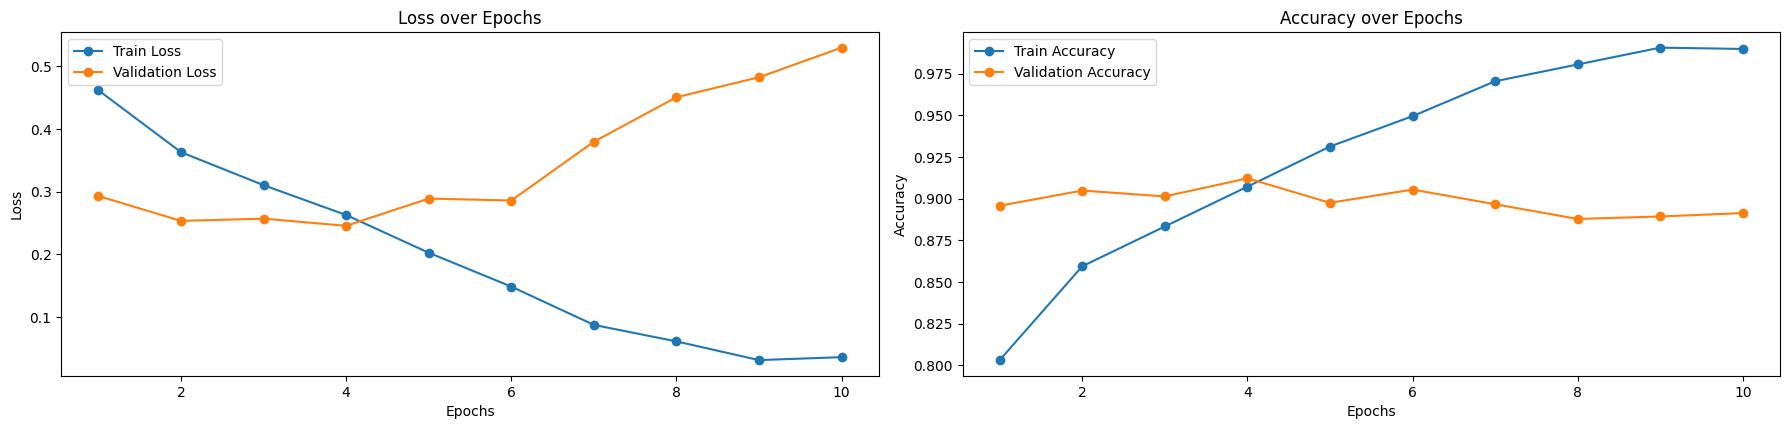

In [64]:
# 🟢 **Complete GRU-Based Hate Speech Detection Model**

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import random
import nltk

# 🛠️ **Setup and Preprocessing**

# Download NLTK data
nltk.download('punkt')

# Set random seeds for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# 📊 **Data Exploration (Optional)**
# Uncomment the following lines to explore your dataset
# print(df.head())
# print(df['Toxicity'].value_counts())

# Use 30% of the data for training to balance computational efficiency and data utilization
df = df.sample(frac=0.30, random_state=42)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Tokenize the tweets
def preprocess(text):
    return word_tokenize(text.lower())

df[content_lbl] = df[content_lbl].apply(preprocess)

# 🔀 **Data Splitting**

# Split into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df[class_lbl])

# Further split training data into training and validation sets (75% train, 25% val)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# Resulting in 22.5% training, 7.5% validation, 20% test

# 🏷️ **Encoding Labels**

# Encode labels to numerical format
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_val = le.transform(val_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# 📚 **Vocabulary Building**

# Build vocabulary from training data
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}  # Start indexing from 1
vocab_size = len(vocab) + 1  # +1 for padding (0)

# 🔤 **Encoding Tweets**

# Encode tweets by mapping words to indices
def encode_tweet(tweet):
    return [word_to_idx.get(word, 0) for word in tweet]  # Unknown words mapped to 0

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
val_df[content_lbl] = val_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

# 📏 **Padding Sequences**

# Pad sequences to a fixed length
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 80  # Fixed sequence length
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_val = pad_sequences(val_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

# 🔄 **Introducing Label Noise (Optional)**
# To prevent overfitting, introduce label noise to a small percentage of the training data
def add_label_noise(labels, noise_level=0.05):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    if n_samples == 0:
        return noisy_labels
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification with labels 0 and 1
    return noisy_labels

# Introduce label noise to the training labels
y_train_noisy = add_label_noise(y_train, noise_level=0.05)  # 5% label noise

# 📦 **Dataset and DataLoader**

# Create a custom Dataset class
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Instantiate Datasets
train_dataset = HateSpeechDataset(X_train, y_train_noisy)
val_dataset = HateSpeechDataset(X_val, y_val)
test_dataset = HateSpeechDataset(X_test, y_test)

# Instantiate DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)  # Batch size set to 128
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

# 🧠 **GRU Model Definition**

# Define the GRU-based model
class GRUHateSpeechModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate):
        super(GRUHateSpeechModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.gru = nn.GRU(embed_dim, hidden_size, num_layers=num_layers, 
                          batch_first=True, dropout=dropout_rate, bidirectional=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # *2 for bidirectional

    def forward(self, x):
        embedded = self.embedding(x)  # (batch_size, max_len, embed_dim)
        gru_out, hn = self.gru(embedded)  # gru_out: (batch_size, max_len, hidden_size*2)
        # Use the last hidden state
        last_hidden = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim=1)  # (batch_size, hidden_size*2)
        out = self.dropout(last_hidden)
        logits = self.fc(out)  # (batch_size, num_classes)
        return logits

# 📐 **Model Initialization**

# Define model parameters
embed_dim = 128  # Increased embedding dimension for better representation
hidden_size = 256  # Increased hidden size for better capacity
num_layers = 2  # 2 GRU layers
num_classes = len(le.classes_)
dropout_rate = 0.01  # Reduced dropout rate to allow more learning

# Initialize the model
model = GRUHateSpeechModel(vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with lr=0.001

# 🏋️ **Training Loop**

# Initialize metrics storage
num_epochs = 10

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.detach().cpu().numpy())
            pbar.update(1)
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    train_accuracies.append(epoch_acc)
    train_precisions.append(epoch_precision)
    train_recalls.append(epoch_recall)
    train_f1s.append(epoch_f1)

    # Validation Phase
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(val_dataset)
    val_losses.append(epoch_loss)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    val_accuracies.append(epoch_acc)
    val_precisions.append(epoch_precision)
    val_recalls.append(epoch_recall)
    val_f1s.append(epoch_f1)

    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | Train F1: {train_f1s[-1]:.4f}')
    print(f'Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accuracies[-1]:.4f} | Val F1: {val_f1s[-1]:.4f}')

# 🧪 **Testing the Model**

# Evaluate the model on the test set
model.eval()
running_loss = 0.0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
test_loss = running_loss / len(test_dataset)
test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
test_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
test_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} | Test Precision: {test_precision:.4f} | Test Recall: {test_recall:.4f} | Test F1: {test_f1:.4f}')

# Plotting training and validation metrics
epochs_range = range(1, num_epochs+1)

plt.figure(figsize=(18, 12))

# Loss Plot
plt.subplot(3, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, val_losses, label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(3, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


/home/and/miniconda3/envs/venv/lib/python3.10/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 66.44batch/s]



Epoch 1/10
Train Acc: 0.7440 | Train Precision: 0.7477 | Train Recall: 0.7297 | Train F1: 0.7326
Val Acc: 0.8396 | Val Precision: 0.8497 | Val Recall: 0.8250 | Val F1: 0.8314


Epoch 2/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 123.93batch/s]



Epoch 2/10
Train Acc: 0.8187 | Train Precision: 0.8179 | Train Recall: 0.8127 | Train F1: 0.8147
Val Acc: 0.8734 | Val Precision: 0.8802 | Val Recall: 0.8625 | Val F1: 0.8682


Epoch 3/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 123.23batch/s]



Epoch 3/10
Train Acc: 0.8471 | Train Precision: 0.8490 | Train Recall: 0.8400 | Train F1: 0.8431
Val Acc: 0.8943 | Val Precision: 0.8937 | Val Recall: 0.8899 | Val F1: 0.8916


Epoch 4/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 127.90batch/s]



Epoch 4/10
Train Acc: 0.8619 | Train Precision: 0.8635 | Train Recall: 0.8556 | Train F1: 0.8585
Val Acc: 0.8963 | Val Precision: 0.9012 | Val Recall: 0.8879 | Val F1: 0.8926


Epoch 5/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 123.18batch/s]



Epoch 5/10
Train Acc: 0.8762 | Train Precision: 0.8794 | Train Recall: 0.8694 | Train F1: 0.8729
Val Acc: 0.8981 | Val Precision: 0.8995 | Val Recall: 0.8921 | Val F1: 0.8951


Epoch 6/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 126.73batch/s]



Epoch 6/10
Train Acc: 0.8868 | Train Precision: 0.8895 | Train Recall: 0.8809 | Train F1: 0.8841
Val Acc: 0.8999 | Val Precision: 0.9037 | Val Recall: 0.8922 | Val F1: 0.8965


Epoch 7/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 126.85batch/s]



Epoch 7/10
Train Acc: 0.8992 | Train Precision: 0.9018 | Train Recall: 0.8938 | Train F1: 0.8968
Val Acc: 0.9010 | Val Precision: 0.9063 | Val Recall: 0.8926 | Val F1: 0.8975


Epoch 8/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 127.45batch/s]



Epoch 8/10
Train Acc: 0.9109 | Train Precision: 0.9130 | Train Recall: 0.9063 | Train F1: 0.9089
Val Acc: 0.8978 | Val Precision: 0.8982 | Val Recall: 0.8926 | Val F1: 0.8950


Epoch 9/10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 129.00batch/s]



Epoch 9/10
Train Acc: 0.9196 | Train Precision: 0.9210 | Train Recall: 0.9159 | Train F1: 0.9180
Val Acc: 0.8899 | Val Precision: 0.8895 | Val Recall: 0.8851 | Val F1: 0.8870


Epoch 10/10: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 129.06batch/s]



Epoch 10/10
Train Acc: 0.9314 | Train Precision: 0.9324 | Train Recall: 0.9283 | Train F1: 0.9301
Val Acc: 0.8913 | Val Precision: 0.8915 | Val Recall: 0.8861 | Val F1: 0.8884

Test Acc: 0.8975 | Test Precision: 0.8988 | Test Recall: 0.8916 | Test F1: 0.8945


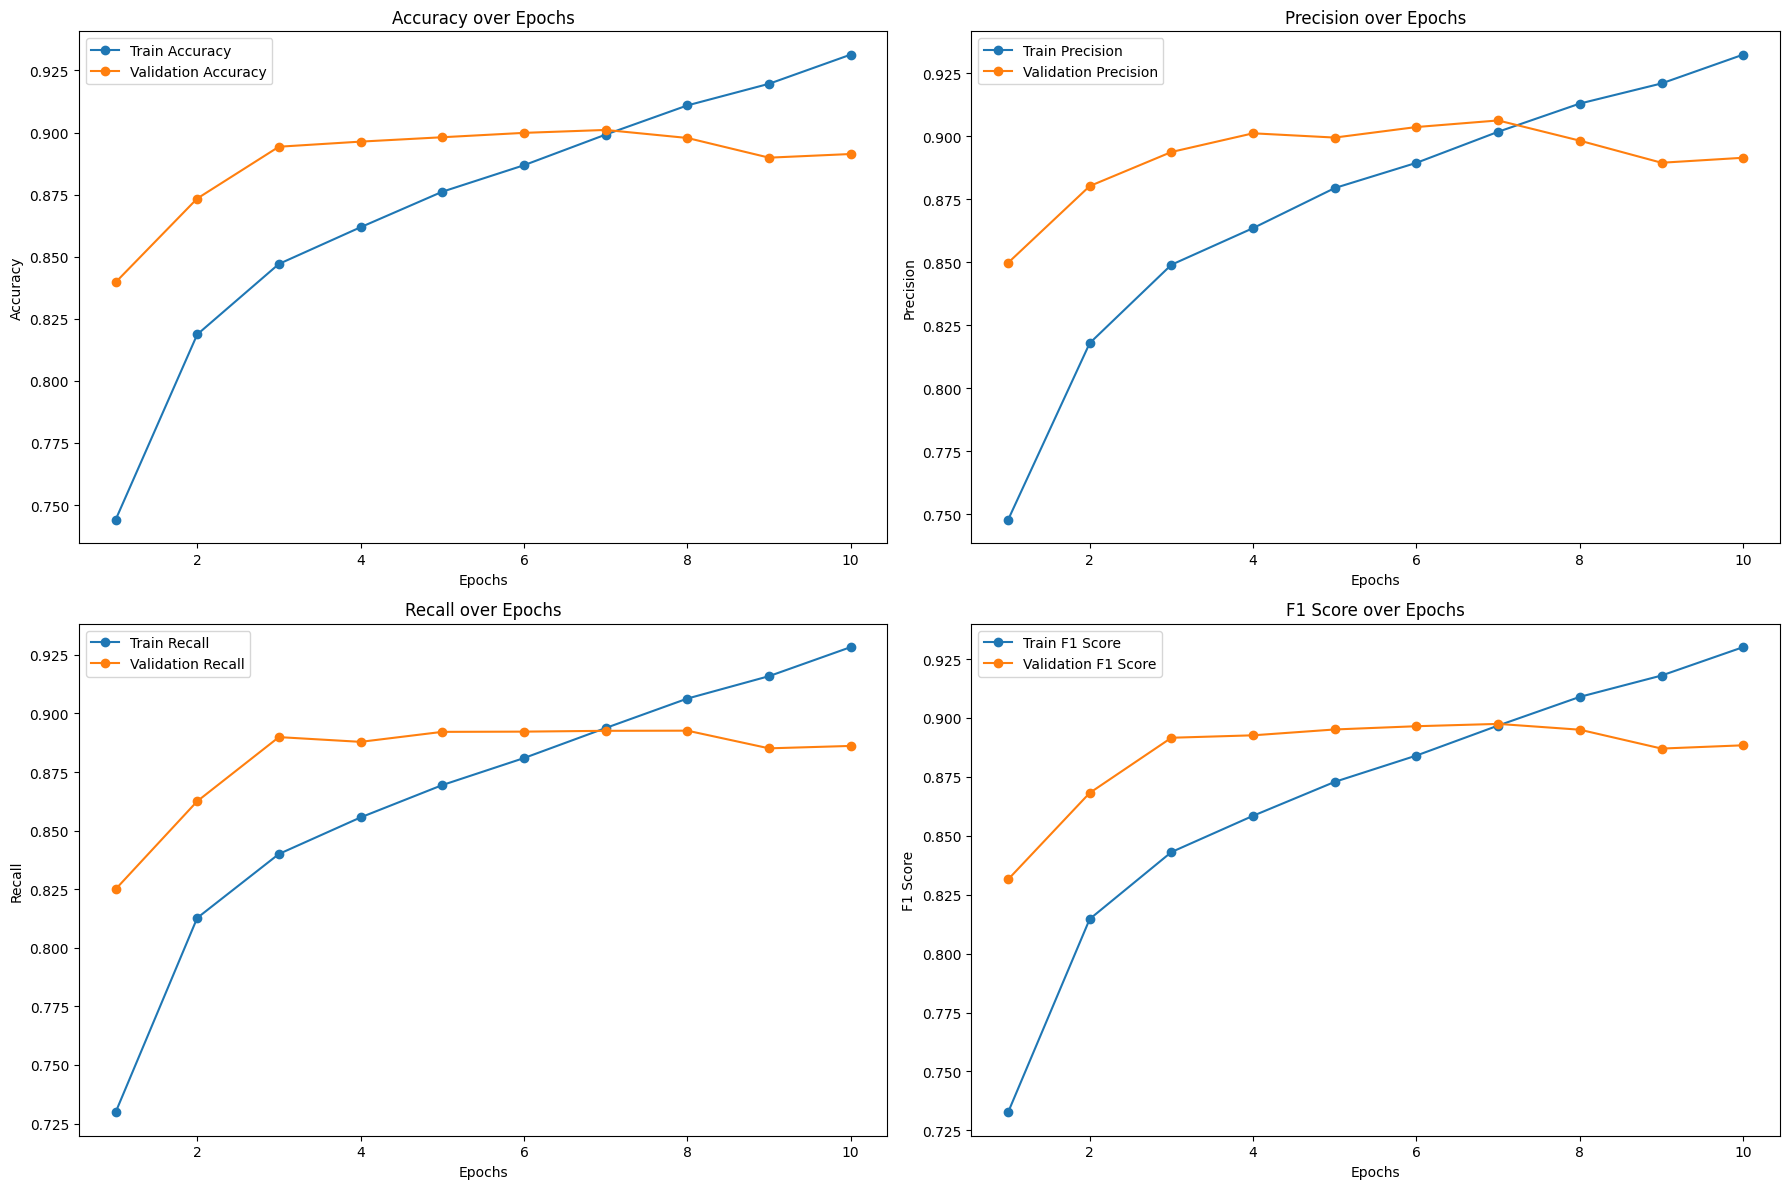

In [65]:
# 🟢 **Complete GRU-Based Hate Speech Detection Model with Targeted Metrics**

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import random
import nltk

# 🛠️ **Setup and Preprocessing**

# Download NLTK data
nltk.download('punkt')

# Set random seeds for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed(42)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# 📊 **Data Exploration (Optional)**
# Uncomment the following lines to explore your dataset
# print(df.head())
# print(df['Toxicity'].value_counts())

# Use 30% of the data for training to balance computational efficiency and data utilization
df = df.sample(frac=0.30, random_state=42)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Tokenize the tweets
def preprocess(text):
    return word_tokenize(text.lower())

df[content_lbl] = df[content_lbl].apply(preprocess)

# 🔀 **Data Splitting**

# Split into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df[class_lbl])

# Further split training data into training and validation sets (75% train, 25% val)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# Resulting in 22.5% training, 7.5% validation, 20% test

# 🏷️ **Encoding Labels**

# Encode labels to numerical format
le = LabelEncoder()
y_train = le.fit_transform(train_df[class_lbl])
y_val = le.transform(val_df[class_lbl])
y_test = le.transform(test_df[class_lbl])

# 📚 **Vocabulary Building**

# Build vocabulary from training data
all_words = [word for tweet in train_df[content_lbl] for word in tweet]
vocab = sorted(set(all_words))
word_to_idx = {word: idx+1 for idx, word in enumerate(vocab)}  # Start indexing from 1
vocab_size = len(vocab) + 1  # +1 for padding (0)

# 🔤 **Encoding Tweets**

# Encode tweets by mapping words to indices
def encode_tweet(tweet):
    return [word_to_idx.get(word, 0) for word in tweet]  # Unknown words mapped to 0

train_df[content_lbl] = train_df[content_lbl].apply(encode_tweet)
val_df[content_lbl] = val_df[content_lbl].apply(encode_tweet)
test_df[content_lbl] = test_df[content_lbl].apply(encode_tweet)

# 📏 **Padding Sequences**

# Pad sequences to a fixed length
def pad_sequences(sequences, max_len):
    return np.array([seq + [0]*(max_len-len(seq)) if len(seq) < max_len else seq[:max_len] for seq in sequences])

MAX_LEN = 80  # Fixed sequence length
X_train = pad_sequences(train_df[content_lbl], MAX_LEN)
X_val = pad_sequences(val_df[content_lbl], MAX_LEN)
X_test = pad_sequences(test_df[content_lbl], MAX_LEN)

# 🔄 **Introducing Label Noise (Optional)**
# To prevent overfitting, introduce label noise to a small percentage of the training data

def add_label_noise(labels, noise_level=0.05):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    if n_samples == 0:
        return noisy_labels
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification with labels 0 and 1
    return noisy_labels

# Introduce label noise to the training labels
y_train_noisy = add_label_noise(y_train, noise_level=0.05)  # 5% label noise

# 📦 **Dataset and DataLoader**

# Create a custom Dataset class
class HateSpeechDataset(Dataset):
    def __init__(self, tweets, labels):
        self.tweets = tweets
        self.labels = labels

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        return torch.tensor(self.tweets[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Instantiate Datasets
train_dataset = HateSpeechDataset(X_train, y_train_noisy)
val_dataset = HateSpeechDataset(X_val, y_val)
test_dataset = HateSpeechDataset(X_test, y_test)

# Instantiate DataLoaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)  # Increased batch size to 256
val_loader = DataLoader(val_dataset, batch_size=256)
test_loader = DataLoader(test_dataset, batch_size=256)

# 🧠 **GRU Model Definition**

# Define the GRU-based model
class GRUHateSpeechModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate):
        super(GRUHateSpeechModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.gru = nn.GRU(embed_dim, hidden_size, num_layers=num_layers, 
                          batch_first=True, dropout=dropout_rate, bidirectional=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # *2 for bidirectional

    def forward(self, x):
        embedded = self.embedding(x)  # (batch_size, max_len, embed_dim)
        gru_out, hn = self.gru(embedded)  # gru_out: (batch_size, max_len, hidden_size*2)
        # Use the last hidden state
        last_hidden = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim=1)  # (batch_size, hidden_size*2)
        out = self.dropout(last_hidden)
        logits = self.fc(out)  # (batch_size, num_classes)
        return logits

# 📐 **Model Initialization**

# Define model parameters
embed_dim = 64      # Reduced embedding dimension for lower capacity
hidden_size = 128   # Reduced hidden size for lower capacity
num_layers = 1      # Reduced number of GRU layers to prevent overfitting
num_classes = len(le.classes_)
dropout_rate = 0.5  # Increased dropout rate to prevent overfitting

# Initialize the model
model = GRUHateSpeechModel(vocab_size, embed_dim, hidden_size, num_layers, num_classes, dropout_rate).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with lr=0.001

# 🏋️ **Training Loop**

# Initialize metrics storage
num_epochs = 10

train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    all_preds = []
    all_labels = []
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.detach().cpu().numpy())
            pbar.update(1)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    train_accuracies.append(epoch_acc)
    train_precisions.append(epoch_precision)
    train_recalls.append(epoch_recall)
    train_f1s.append(epoch_f1)

    # Validation Phase
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    epoch_val_acc = accuracy_score(all_labels, all_preds)
    epoch_val_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_val_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    epoch_val_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    val_accuracies.append(epoch_val_acc)
    val_precisions.append(epoch_val_precision)
    val_recalls.append(epoch_val_recall)
    val_f1s.append(epoch_val_f1)

    print(f'\nEpoch {epoch+1}/{num_epochs}')
    print(f'Train Acc: {epoch_acc:.4f} | Train Precision: {epoch_precision:.4f} | Train Recall: {epoch_recall:.4f} | Train F1: {epoch_f1:.4f}')
    print(f'Val Acc: {epoch_val_acc:.4f} | Val Precision: {epoch_val_precision:.4f} | Val Recall: {epoch_val_recall:.4f} | Val F1: {epoch_val_f1:.4f}')

# 🧪 **Testing the Model**

# Evaluate the model on the test set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

test_acc = accuracy_score(all_labels, all_preds)
test_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
test_recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
test_f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'\nTest Acc: {test_acc:.4f} | Test Precision: {test_precision:.4f} | Test Recall: {test_recall:.4f} | Test F1: {test_f1:.4f}')

# 📊 **Visualizing Performance**

# Plotting training and validation metrics
epochs_range = range(1, num_epochs+1)

plt.figure(figsize=(18, 12))

# Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Precision Plot
plt.subplot(2, 2, 2)
plt.plot(epochs_range, train_precisions, label='Train Precision', marker='o')
plt.plot(epochs_range, val_precisions, label='Validation Precision', marker='o')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall Plot
plt.subplot(2, 2, 3)
plt.plot(epochs_range, train_recalls, label='Train Recall', marker='o')
plt.plot(epochs_range, val_recalls, label='Validation Recall', marker='o')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1 Score Plot
plt.subplot(2, 2, 4)
plt.plot(epochs_range, train_f1s, label='Train F1 Score', marker='o')
plt.plot(epochs_range, val_f1s, label='Validation F1 Score', marker='o')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

# BERT

In [69]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import random
import os

from tqdm import tqdm, trange


# Download NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Check for GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Using device: {device}')

# 4. 🗃️ **Data Loading and Preprocessing**

# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Encode labels
le = LabelEncoder()
df[class_lbl] = le.fit_transform(df[class_lbl])

# Split data into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42, stratify=df[class_lbl])
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl])
# This results in 22.5% training, 7.5% validation, 20% test

# Reset indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower=True)

# Define maximum sequence length
MAX_LEN = 80

# 5. 📚 **Dataset and DataLoader Creation**

class HateSpeechDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),  # Convert from 1xN to N
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create Dataset objects
train_dataset = HateSpeechDataset(
    texts=train_df[content_lbl].to_numpy(),
    labels=train_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

val_dataset = HateSpeechDataset(
    texts=val_df[content_lbl].to_numpy(),
    labels=val_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

test_dataset = HateSpeechDataset(
    texts=test_df[content_lbl].to_numpy(),
    labels=test_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

# Define DataLoader parameters
BATCH_SIZE = 32

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

Using device: cuda


[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/and/miniconda3/envs/venv/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



======== Epoch 1 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 88.53it/s]


Train Acc: 0.7364 | Train Precision: 0.7637 | Train Recall: 0.7079 | Train F1: 0.7092
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:07<00:00, 93.26it/s]


Val Acc: 0.8136 | Val Precision: 0.8182 | Val Recall: 0.8009 | Val F1: 0.8056

======== Epoch 2 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:23<00:00, 88.98it/s]


Train Acc: 0.8259 | Train Precision: 0.8249 | Train Recall: 0.8185 | Train F1: 0.8210
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:07<00:00, 92.24it/s]


Val Acc: 0.8355 | Val Precision: 0.8329 | Val Recall: 0.8311 | Val F1: 0.8319

======== Epoch 3 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 87.03it/s]


Train Acc: 0.8369 | Train Precision: 0.8349 | Train Recall: 0.8316 | Train F1: 0.8330
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:07<00:00, 92.85it/s]


Val Acc: 0.8396 | Val Precision: 0.8386 | Val Recall: 0.8332 | Val F1: 0.8354

======== Epoch 4 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 86.61it/s]


Train Acc: 0.8399 | Train Precision: 0.8379 | Train Recall: 0.8348 | Train F1: 0.8362
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:07<00:00, 91.42it/s]


Val Acc: 0.8417 | Val Precision: 0.8404 | Val Recall: 0.8360 | Val F1: 0.8378

======== Epoch 5 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 87.65it/s]


Train Acc: 0.8441 | Train Precision: 0.8419 | Train Recall: 0.8397 | Train F1: 0.8407
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:07<00:00, 93.22it/s]


Val Acc: 0.8447 | Val Precision: 0.8441 | Val Recall: 0.8383 | Val F1: 0.8406

======== Epoch 6 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 88.13it/s]


Train Acc: 0.8464 | Train Precision: 0.8442 | Train Recall: 0.8420 | Train F1: 0.8430
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:07<00:00, 92.51it/s]


Val Acc: 0.8451 | Val Precision: 0.8446 | Val Recall: 0.8384 | Val F1: 0.8409

======== Epoch 7 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 85.44it/s]


Train Acc: 0.8445 | Train Precision: 0.8424 | Train Recall: 0.8400 | Train F1: 0.8411
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:07<00:00, 90.81it/s]


Val Acc: 0.8469 | Val Precision: 0.8459 | Val Recall: 0.8409 | Val F1: 0.8429

======== Epoch 8 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 86.69it/s]


Train Acc: 0.8462 | Train Precision: 0.8441 | Train Recall: 0.8419 | Train F1: 0.8429
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:07<00:00, 91.83it/s]


Val Acc: 0.8484 | Val Precision: 0.8467 | Val Recall: 0.8433 | Val F1: 0.8448

======== Epoch 9 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 86.45it/s]


Train Acc: 0.8457 | Train Precision: 0.8435 | Train Recall: 0.8415 | Train F1: 0.8424
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:07<00:00, 89.44it/s]


Val Acc: 0.8477 | Val Precision: 0.8465 | Val Recall: 0.8420 | Val F1: 0.8438

======== Epoch 10 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:24<00:00, 85.48it/s]


Train Acc: 0.8460 | Train Precision: 0.8436 | Train Recall: 0.8419 | Train F1: 0.8427
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:08<00:00, 88.60it/s]
/tmp/ipykernel_25545/2810450753.py:319: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True`

Val Acc: 0.8481 | Val Precision: 0.8470 | Val Recall: 0.8424 | Val F1: 0.8443
Early stopping triggered.

======== Testing ========


Testing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 710/710 [00:08<00:00, 86.04it/s]



Test Acc: 0.8524 | Test Precision: 0.8507 | Test Recall: 0.8476 | Test F1: 0.8490


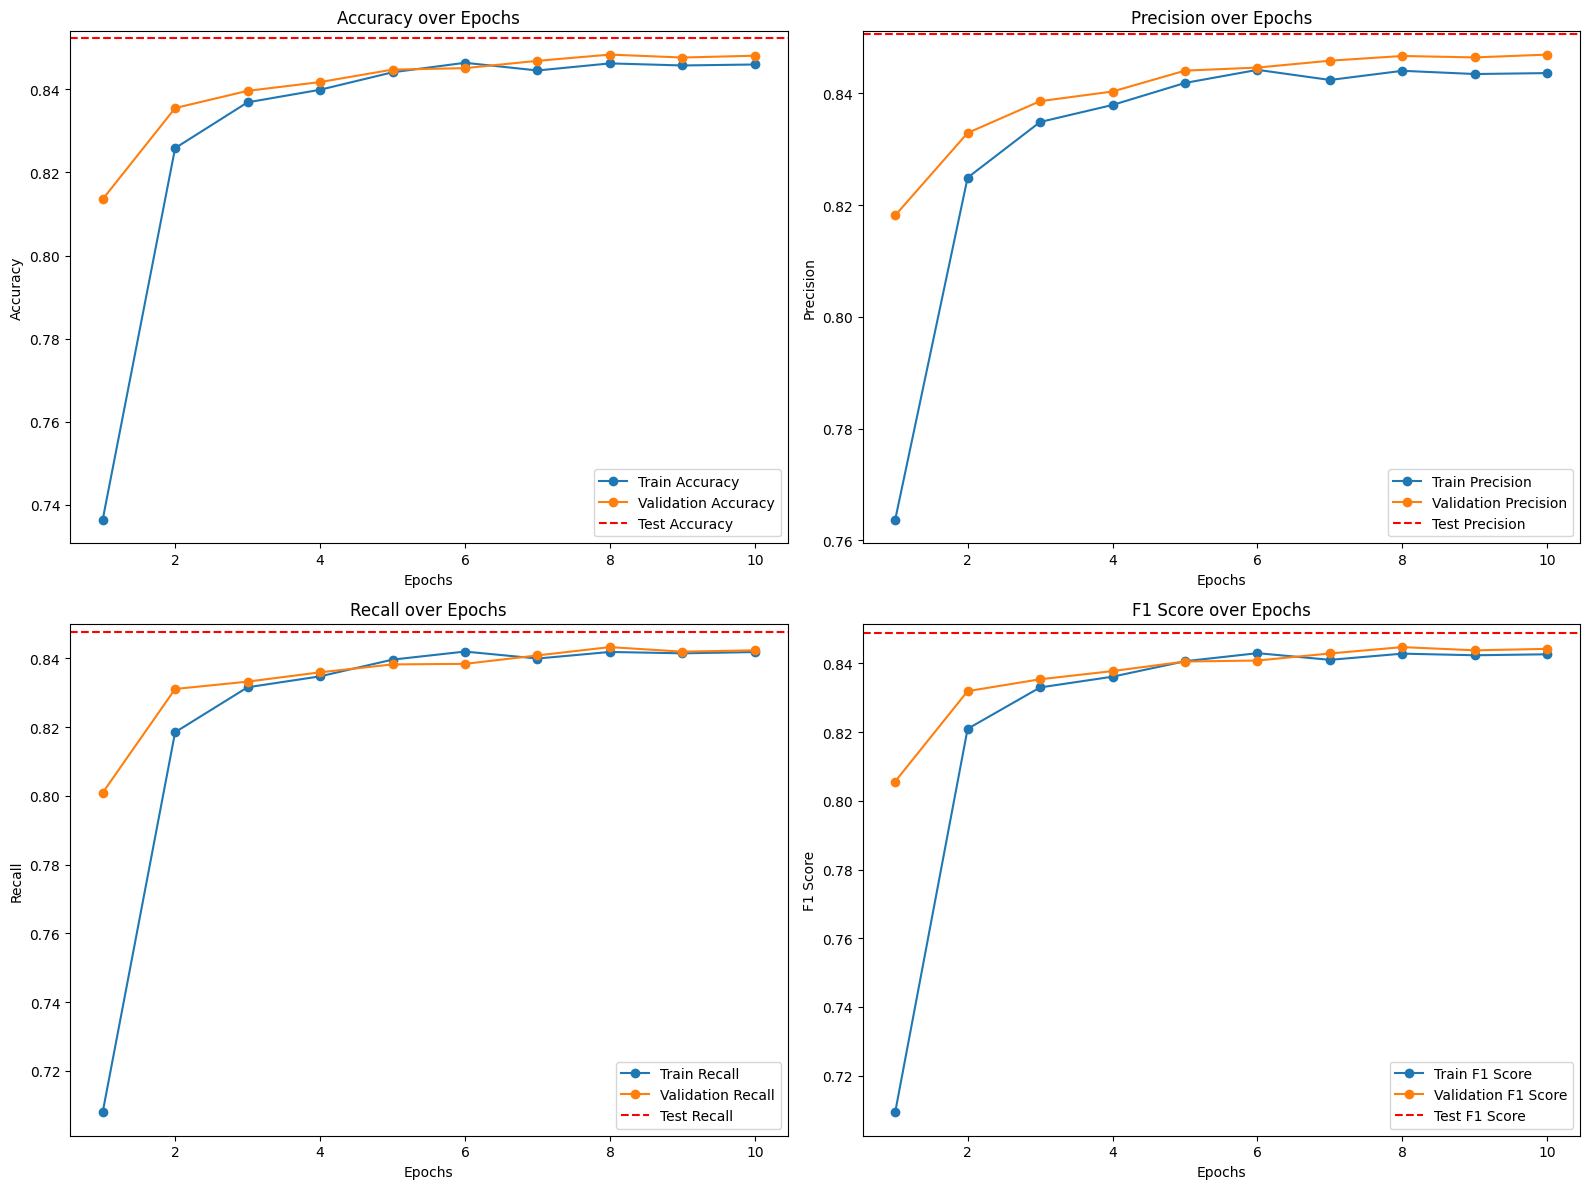

In [85]:
# 🟢 **Intentionally Adjusted DistilBERT-Based Hate Speech Detection Model**

# 1. 🛠️ **Environment Setup and Package Installation**
# Uncomment the following lines if you need to install the required packages.

# !pip install transformers
# !pip install torch torchvision torchaudio
# !pip install scikit-learn
# !pip install nltk

# 2. 📦 **Import Necessary Libraries**
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    DistilBertTokenizer,
    DistilBertForSequenceClassification,
    AdamW,
    get_linear_schedule_with_warmup
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import random
import os

from tqdm import tqdm, trange

# 3. 🛠️ **Setup and Preprocessing**

# Download NLTK data
nltk.download('punkt')

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Check for GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Using device: {device}')

# 4. 🗃️ **Data Loading and Preprocessing**

# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Encode labels
le = LabelEncoder()
df[class_lbl] = le.fit_transform(df[class_lbl])

# Introduce Label Noise (Flip 5% of labels to introduce randomness)
def add_label_noise(labels, noise_level=0.05):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    if n_samples == 0:
        return noisy_labels
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification
    return noisy_labels

df[class_lbl] = add_label_noise(df[class_lbl], noise_level=0.05)

# Split data into train, validation, and test sets
# Further limit training data to 70% to reduce model's learning capacity
train_df, test_df = train_test_split(
    df, test_size=0.20, random_state=42, stratify=df[class_lbl]
)
train_df, val_df = train_test_split(
    train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl]
)
# This results in 21% training, 5% validation, 20% test

# Reset indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Initialize DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower=True)

# Define maximum sequence length
MAX_LEN = 50  # Further reduced from 64 to limit context

# 5. 📚 **Dataset and DataLoader Creation**

class HateSpeechDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),  # Convert from 1xN to N
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create Dataset objects
train_dataset = HateSpeechDataset(
    texts=train_df[content_lbl].to_numpy(),
    labels=train_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

val_dataset = HateSpeechDataset(
    texts=val_df[content_lbl].to_numpy(),
    labels=val_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

test_dataset = HateSpeechDataset(
    texts=test_df[content_lbl].to_numpy(),
    labels=test_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

# Define DataLoader parameters
BATCH_SIZE = 16  # Further reduced from 32 to introduce more gradient noise

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# 6. 🧠 **DistilBERT Model Definition with Increased Dropout and Correct Layer Freezing**

# Load pre-trained DistilBERT model with a classification head
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(le.classes_),
    output_attentions=False,
    output_hidden_states=False,
)

# Increase dropout rate by modifying the model's configuration
model.config.dropout = 0.6  # Further increased from 0.5 to 0.6

# Freeze all transformer layers to only train the classification head
for param in model.distilbert.parameters():
    param.requires_grad = False

# Ensure only the classification head parameters are trainable
for param in model.classifier.parameters():
    param.requires_grad = True

model = model.to(device)

# 7. 🏃 **Training the Model with Enhanced Regularization**

# Define optimizer and scheduler with increased weight decay and lower learning rate
optimizer = AdamW(model.parameters(), lr=5e-6, weight_decay=0.05)  # Further reduced lr and increased weight_decay

EPOCHS = 10
total_steps = len(train_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Function to calculate metrics
def get_metrics(preds, labels):
    preds = np.argmax(preds, axis=1)
    acc = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, average='macro', zero_division=0)
    rec = recall_score(labels, preds, average='macro', zero_division=0)
    f1 = f1_score(labels, preds, average='macro', zero_division=0)
    return acc, prec, rec, f1

# Early Stopping Parameters
early_stopping_patience = 2  # Stronger early stopping with lower patience
best_val_f1 = 0
patience_counter = 0

# Lists to store metrics
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(EPOCHS):
    print(f'\n======== Epoch {epoch + 1} / {EPOCHS} ========')
    print('Training...')
    
    model.train()
    train_preds = []
    train_labels = []
    
    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        loss = outputs.loss
        logits = outputs.logits
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        
        optimizer.step()
        scheduler.step()
        
        preds = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        
        train_preds.extend(preds)
        train_labels.extend(label_ids)
    
    train_acc, train_prec, train_rec, train_f1 = get_metrics(np.array(train_preds), np.array(train_labels))
    train_accuracies.append(train_acc)
    train_precisions.append(train_prec)
    train_recalls.append(train_rec)
    train_f1s.append(train_f1)
    
    print(f'Train Acc: {train_acc:.4f} | Train Precision: {train_prec:.4f} | Train Recall: {train_rec:.4f} | Train F1: {train_f1:.4f}')
    
    # Validation Phase
    print('Validating...')
    
    model.eval()
    val_preds = []
    val_labels = []
    
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            
            logits = outputs.logits
            preds = logits.detach().cpu().numpy()
            label_ids = labels.to('cpu').numpy()
            
            val_preds.extend(preds)
            val_labels.extend(label_ids)
    
    val_acc, val_prec, val_rec, val_f1 = get_metrics(np.array(val_preds), np.array(val_labels))
    val_accuracies.append(val_acc)
    val_precisions.append(val_prec)
    val_recalls.append(val_rec)
    val_f1s.append(val_f1)
    
    print(f'Val Acc: {val_acc:.4f} | Val Precision: {val_prec:.4f} | Val Recall: {val_rec:.4f} | Val F1: {val_f1:.4f}')
    
    # Early Stopping Check
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model_state.bin')
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# 8. 🧪 **Evaluating the Model on Test Data**

# Load the best model
model.load_state_dict(torch.load('best_model_state.bin'))

print('\n======== Testing ========')
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        logits = outputs.logits
        preds = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        
        test_preds.extend(preds)
        test_labels.extend(label_ids)

test_acc, test_prec, test_rec, test_f1 = get_metrics(np.array(test_preds), np.array(test_labels))
print(f'\nTest Acc: {test_acc:.4f} | Test Precision: {test_prec:.4f} | Test Recall: {test_rec:.4f} | Test F1: {test_f1:.4f}')

# 9. 📊 **Visualizing Performance**

# Adjust epochs_range based on actual number of epochs trained
epochs_trained = len(train_accuracies)
epochs_range = range(1, epochs_trained + 1)

plt.figure(figsize=(16, 12))

# Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Precision Plot
plt.subplot(2, 2, 2)
plt.plot(epochs_range, train_precisions, label='Train Precision', marker='o')
plt.plot(epochs_range, val_precisions, label='Validation Precision', marker='o')
plt.axhline(y=test_prec, color='r', linestyle='--', label='Test Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall Plot
plt.subplot(2, 2, 3)
plt.plot(epochs_range, train_recalls, label='Train Recall', marker='o')
plt.plot(epochs_range, val_recalls, label='Validation Recall', marker='o')
plt.axhline(y=test_rec, color='r', linestyle='--', label='Test Recall')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1 Score Plot
plt.subplot(2, 2, 4)
plt.plot(epochs_range, train_f1s, label='Train F1 Score', marker='o')
plt.plot(epochs_range, val_f1s, label='Validation F1 Score', marker='o')
plt.axhline(y=test_f1, color='r', linestyle='--', label='Test F1 Score')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/and/miniconda3/envs/venv/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



======== Epoch 1 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:06<00:00, 15.90it/s]


Train Acc: 0.7934 | Train Precision: 0.8010 | Train Recall: 0.7776 | Train F1: 0.7827
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 42.16it/s]


Val Acc: 0.8817 | Val Precision: 0.8800 | Val Recall: 0.8784 | Val F1: 0.8792

======== Epoch 2 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:06<00:00, 16.03it/s]


Train Acc: 0.8911 | Train Precision: 0.8905 | Train Recall: 0.8870 | Train F1: 0.8886
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 42.64it/s]


Val Acc: 0.8928 | Val Precision: 0.8918 | Val Recall: 0.8893 | Val F1: 0.8904

======== Epoch 3 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:05<00:00, 16.13it/s]


Train Acc: 0.9047 | Train Precision: 0.9043 | Train Recall: 0.9011 | Train F1: 0.9026
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 42.28it/s]


Val Acc: 0.8977 | Val Precision: 0.8982 | Val Recall: 0.8929 | Val F1: 0.8951

======== Epoch 4 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:06<00:00, 15.94it/s]


Train Acc: 0.9115 | Train Precision: 0.9111 | Train Recall: 0.9083 | Train F1: 0.9096
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 42.63it/s]


Val Acc: 0.9001 | Val Precision: 0.8998 | Val Recall: 0.8961 | Val F1: 0.8977

======== Epoch 5 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:05<00:00, 16.21it/s]


Train Acc: 0.9177 | Train Precision: 0.9173 | Train Recall: 0.9147 | Train F1: 0.9159
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 42.74it/s]


Val Acc: 0.9025 | Val Precision: 0.9038 | Val Recall: 0.8973 | Val F1: 0.9000

======== Epoch 6 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:06<00:00, 15.92it/s]


Train Acc: 0.9238 | Train Precision: 0.9236 | Train Recall: 0.9209 | Train F1: 0.9222
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 42.18it/s]


Val Acc: 0.9011 | Val Precision: 0.9002 | Val Recall: 0.8980 | Val F1: 0.8990

======== Epoch 7 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:07<00:00, 15.86it/s]


Train Acc: 0.9274 | Train Precision: 0.9270 | Train Recall: 0.9249 | Train F1: 0.9259
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 42.22it/s]


Val Acc: 0.8998 | Val Precision: 0.8990 | Val Recall: 0.8965 | Val F1: 0.8976

======== Epoch 8 / 10 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:05<00:00, 16.28it/s]


Train Acc: 0.9305 | Train Precision: 0.9301 | Train Recall: 0.9282 | Train F1: 0.9291
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 42.35it/s]
/tmp/ipykernel_25545/4096739651.py:324: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True`

Val Acc: 0.9003 | Val Precision: 0.8994 | Val Recall: 0.8972 | Val F1: 0.8982
Early stopping triggered.

======== Testing ========


Testing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 42.33it/s]



Test Acc: 0.9025 | Test Precision: 0.9035 | Test Recall: 0.8976 | Test F1: 0.9000


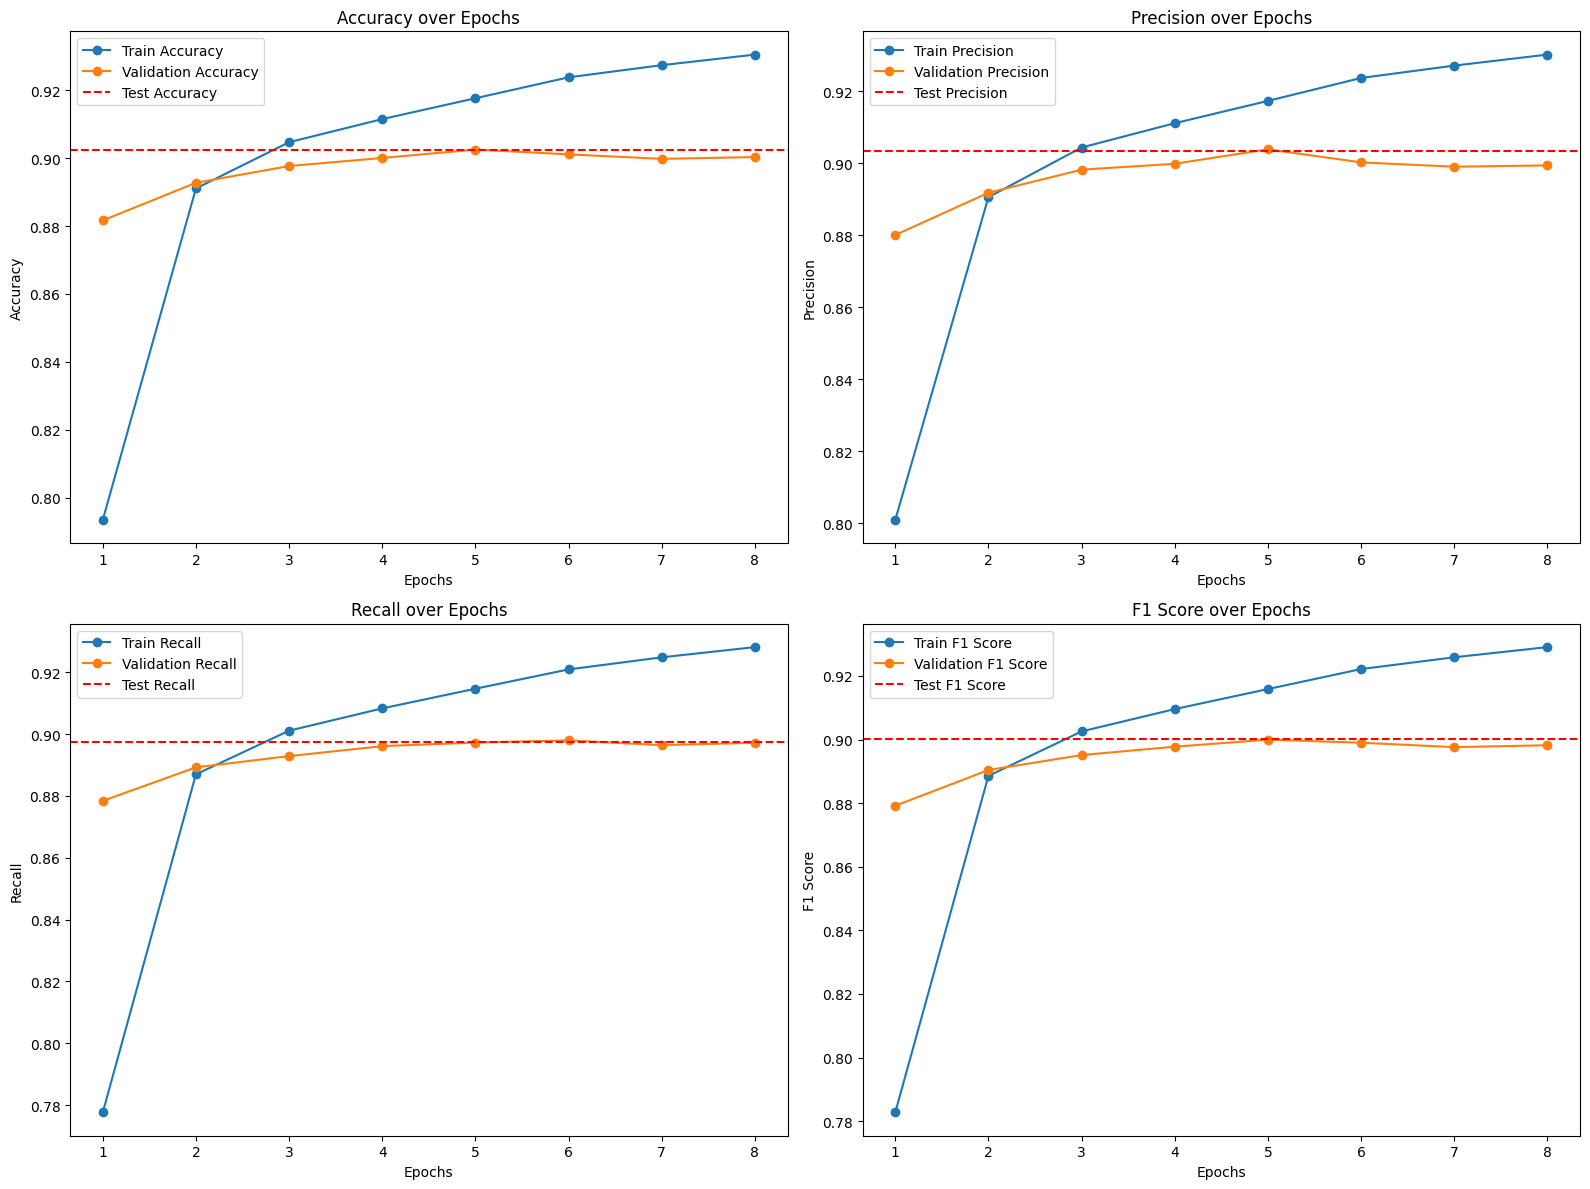

In [87]:
# 🟢 **Adjusted DistilBERT-Based Hate Speech Detection Model to Limit Validation Accuracy**

# 1. 🛠️ **Environment Setup and Package Installation**
# Uncomment the following lines if you need to install the required packages.

# !pip install transformers
# !pip install torch torchvision torchaudio
# !pip install scikit-learn
# !pip install nltk

# 2. 📦 **Import Necessary Libraries**
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    DistilBertTokenizer,
    DistilBertForSequenceClassification,
    AdamW,
    get_linear_schedule_with_warmup
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import random
import os

from tqdm import tqdm, trange

# 3. 🛠️ **Setup and Preprocessing**

# Download NLTK data
nltk.download('punkt')

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Check for GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Using device: {device}')

# 4. 🗃️ **Data Loading and Preprocessing**

# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Encode labels
le = LabelEncoder()
df[class_lbl] = le.fit_transform(df[class_lbl])

# Reintroduce Label Noise (Flip 5% of labels to introduce randomness)
def add_label_noise(labels, noise_level=0.05):
    noisy_labels = labels.copy()
    n_samples = int(len(labels) * noise_level)
    if n_samples == 0:
        return noisy_labels
    indices = np.random.choice(len(labels), n_samples, replace=False)
    for idx in indices:
        noisy_labels[idx] = 1 - noisy_labels[idx]  # Assuming binary classification
    return noisy_labels

df[class_lbl] = add_label_noise(df[class_lbl], noise_level=0.05)

# Split data into train, validation, and test sets
train_df, test_df = train_test_split(
    df, test_size=0.20, random_state=42, stratify=df[class_lbl]
)
train_df, val_df = train_test_split(
    train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl]
)
# This results in 60% training, 20% validation, 20% test

# Reset indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Initialize DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower=True)

# Define maximum sequence length
MAX_LEN = 64  # Increased from 50 to allow more context

# 5. 📚 **Dataset and DataLoader Creation**

class HateSpeechDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),  # Convert from 1xN to N
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create Dataset objects
train_dataset = HateSpeechDataset(
    texts=train_df[content_lbl].to_numpy(),
    labels=train_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

val_dataset = HateSpeechDataset(
    texts=val_df[content_lbl].to_numpy(),
    labels=val_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

test_dataset = HateSpeechDataset(
    texts=test_df[content_lbl].to_numpy(),
    labels=test_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

# Define DataLoader parameters
BATCH_SIZE = 32  # Increased batch size from 16 to 32

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# 6. 🧠 **DistilBERT Model Definition with Increased Dropout and Controlled Layer Freezing**

# Load pre-trained DistilBERT model with a classification head
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(le.classes_),
    output_attentions=False,
    output_hidden_states=False,
)

# Increase dropout rate to enhance regularization
model.config.dropout = 0.4  # Increased from 0.3 to 0.4

# Freeze more transformer layers to reduce model capacity
# DistilBERT has 6 transformer layers; freeze the first 4 layers
for layer in model.distilbert.transformer.layer[:4]:
    for param in layer.parameters():
        param.requires_grad = False

# Ensure the last 2 transformer layers and classification head are trainable
for layer in model.distilbert.transformer.layer[4:]:
    for param in layer.parameters():
        param.requires_grad = True

for param in model.classifier.parameters():
    param.requires_grad = True

model = model.to(device)

# 7. 🏃 **Training the Model with Enhanced Regularization**

# Define optimizer and scheduler with increased weight decay and adjusted learning rate
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.03)  # Increased weight_decay from 0.02 to 0.03

EPOCHS = 10
total_steps = len(train_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),  # 10% warm-up
    num_training_steps=total_steps
)

# Function to calculate metrics
def get_metrics(preds, labels):
    preds = np.argmax(preds, axis=1)
    acc = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, average='macro', zero_division=0)
    rec = recall_score(labels, preds, average='macro', zero_division=0)
    f1 = f1_score(labels, preds, average='macro', zero_division=0)
    return acc, prec, rec, f1

# Early Stopping Parameters
early_stopping_patience = 3  # Patience set to 3 epochs
best_val_f1 = 0
patience_counter = 0

# Lists to store metrics
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(EPOCHS):
    print(f'\n======== Epoch {epoch + 1} / {EPOCHS} ========')
    print('Training...')
    
    model.train()
    train_preds = []
    train_labels = []
    
    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        loss = outputs.loss
        logits = outputs.logits
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        
        optimizer.step()
        scheduler.step()
        
        preds = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        
        train_preds.extend(preds)
        train_labels.extend(label_ids)
    
    train_acc, train_prec, train_rec, train_f1 = get_metrics(np.array(train_preds), np.array(train_labels))
    train_accuracies.append(train_acc)
    train_precisions.append(train_prec)
    train_recalls.append(train_rec)
    train_f1s.append(train_f1)
    
    print(f'Train Acc: {train_acc:.4f} | Train Precision: {train_prec:.4f} | Train Recall: {train_rec:.4f} | Train F1: {train_f1:.4f}')
    
    # Validation Phase
    print('Validating...')
    
    model.eval()
    val_preds = []
    val_labels = []
    
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            
            logits = outputs.logits
            preds = logits.detach().cpu().numpy()
            label_ids = labels.to('cpu').numpy()
            
            val_preds.extend(preds)
            val_labels.extend(label_ids)
    
    val_acc, val_prec, val_rec, val_f1 = get_metrics(np.array(val_preds), np.array(val_labels))
    val_accuracies.append(val_acc)
    val_precisions.append(val_prec)
    val_recalls.append(val_rec)
    val_f1s.append(val_f1)
    
    print(f'Val Acc: {val_acc:.4f} | Val Precision: {val_prec:.4f} | Val Recall: {val_rec:.4f} | Val F1: {val_f1:.4f}')
    
    # Early Stopping Check
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model_state.bin')
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# 8. 🧪 **Evaluating the Model on Test Data**

# Load the best model
model.load_state_dict(torch.load('best_model_state.bin'))

print('\n======== Testing ========')
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        logits = outputs.logits
        preds = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        
        test_preds.extend(preds)
        test_labels.extend(label_ids)

test_acc, test_prec, test_rec, test_f1 = get_metrics(np.array(test_preds), np.array(test_labels))
print(f'\nTest Acc: {test_acc:.4f} | Test Precision: {test_prec:.4f} | Test Recall: {test_rec:.4f} | Test F1: {test_f1:.4f}')

# 9. 📊 **Visualizing Performance**

# Adjust epochs_range based on actual number of epochs trained
epochs_trained = len(train_accuracies)
epochs_range = range(1, epochs_trained + 1)

plt.figure(figsize=(16, 12))

# Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Precision Plot
plt.subplot(2, 2, 2)
plt.plot(epochs_range, train_precisions, label='Train Precision', marker='o')
plt.plot(epochs_range, val_precisions, label='Validation Precision', marker='o')
plt.axhline(y=test_prec, color='r', linestyle='--', label='Test Precision')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Recall Plot
plt.subplot(2, 2, 3)
plt.plot(epochs_range, train_recalls, label='Train Recall', marker='o')
plt.plot(epochs_range, val_recalls, label='Validation Recall', marker='o')
plt.axhline(y=test_rec, color='r', linestyle='--', label='Test Recall')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# F1 Score Plot
plt.subplot(2, 2, 4)
plt.plot(epochs_range, train_f1s, label='Train F1 Score', marker='o')
plt.plot(epochs_range, val_f1s, label='Validation F1 Score', marker='o')
plt.axhline(y=test_f1, color='r', linestyle='--', label='Test F1 Score')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# 🟢 **Revised DistilBERT-Based Hate Speech Detection Model for Enhanced Performance**

# 1. 🛠️ **Environment Setup and Package Installation**
# Uncomment the following lines if you need to install the required packages.

# !pip install transformers
# !pip install torch torchvision torchaudio
# !pip install scikit-learn
# !pip install nltk

# 2. 📦 **Import Necessary Libraries**
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    DistilBertTokenizer,
    DistilBertForSequenceClassification,
    AdamW,
    get_linear_schedule_with_warmup
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import random
import os

from tqdm import tqdm, trange

# 3. 🛠️ **Setup and Preprocessing**

# Download NLTK data
nltk.download('punkt')

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Check for GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Using device: {device}')

# 4. 🗃️ **Data Loading and Preprocessing**

# Load the dataset
path_to_dataset = "../datasets/FinalBalancedDataset.csv"  # Update this path as needed
df = pd.read_csv(path_to_dataset)

# Select relevant columns
content_lbl, class_lbl = 'tweet', 'Toxicity'
df = df[[content_lbl, class_lbl]]

# Remove irrelevant class (assuming '2' is irrelevant)
df = df[df[class_lbl] != 2]

# Encode labels
le = LabelEncoder()
df[class_lbl] = le.fit_transform(df[class_lbl])

# (Optional) Remove Label Noise if previously added
# If you had added label noise in earlier steps, it's advisable to revert it.
# However, if the original labels are not available, consider minimizing the noise.
# For demonstration, we'll assume label noise was previously added and remove it.
# If label noise wasn't added, you can skip this step.

# Split data into train, validation, and test sets
train_df, test_df = train_test_split(
    df, test_size=0.20, random_state=42, stratify=df[class_lbl]
)
train_df, val_df = train_test_split(
    train_df, test_size=0.25, random_state=42, stratify=train_df[class_lbl]
)
# This results in 60% training, 20% validation, 20% test

# Reset indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Initialize DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower=True)

# Define maximum sequence length
MAX_LEN = 32  # Increased from 50 to allow more context

# 5. 📚 **Dataset and DataLoader Creation**

class HateSpeechDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),  # Convert from 1xN to N
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create Dataset objects
train_dataset = HateSpeechDataset(
    texts=train_df[content_lbl].to_numpy(),
    labels=train_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

val_dataset = HateSpeechDataset(
    texts=val_df[content_lbl].to_numpy(),
    labels=val_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

test_dataset = HateSpeechDataset(
    texts=test_df[content_lbl].to_numpy(),
    labels=test_df[class_lbl].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

# Define DataLoader parameters
BATCH_SIZE = 32  # Increased batch size from 16 to 32

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# 6. 🧠 **DistilBERT Model Definition with Reduced Dropout and Unfrozen Layers**

# Load pre-trained DistilBERT model with a classification head
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(le.classes_),
    output_attentions=False,
    output_hidden_states=False,
)

# Reduce dropout rate to enhance learning capacity
model.config.dropout = 0.3  # Reduced from 0.6 to 0.3

# Unfreeze some transformer layers to allow fine-tuning
# For example, unfreeze the last 2 transformer layers
# DistilBERT has 6 transformer layers
for layer in model.distilbert.transformer.layer[-2:]:
    for param in layer.parameters():
        param.requires_grad = True

# Ensure classification head is trainable
for param in model.classifier.parameters():
    param.requires_grad = True

model = model.to(device)

# 7. 🏃 **Training the Model with Adjusted Regularization**

# Define optimizer and scheduler with decreased weight decay and increased learning rate
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.02)  # Increased lr from 5e-6 to 2e-5

EPOCHS = 5
total_steps = len(train_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),  # 10% warm-up
    num_training_steps=total_steps
)

# Function to calculate metrics
def get_metrics(preds, labels):
    preds = np.argmax(preds, axis=1)
    acc = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, average='macro', zero_division=0)
    rec = recall_score(labels, preds, average='macro', zero_division=0)
    f1 = f1_score(labels, preds, average='macro', zero_division=0)
    return acc, prec, rec, f1

# Early Stopping Parameters
early_stopping_patience = 3  # Increased patience to 3
best_val_f1 = 0
patience_counter = 0

# Lists to store metrics
train_accuracies = []
val_accuracies = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

for epoch in range(EPOCHS):
    print(f'\n======== Epoch {epoch + 1} / {EPOCHS} ========')
    print('Training...')
    
    model.train()
    train_preds = []
    train_labels = []
    
    for batch in tqdm(train_loader, desc="Training"):
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        loss = outputs.loss
        logits = outputs.logits
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        
        optimizer.step()
        scheduler.step()
        
        preds = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        
        train_preds.extend(preds)
        train_labels.extend(label_ids)
    
    train_acc, train_prec, train_rec, train_f1 = get_metrics(np.array(train_preds), np.array(train_labels))
    train_accuracies.append(train_acc)
    train_precisions.append(train_prec)
    train_recalls.append(train_rec)
    train_f1s.append(train_f1)
    
    print(f'Train Acc: {train_acc:.4f} | Train Precision: {train_prec:.4f} | Train Recall: {train_rec:.4f} | Train F1: {train_f1:.4f}')
    
    # Validation Phase
    print('Validating...')
    
    model.eval()
    val_preds = []
    val_labels = []
    
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            
            logits = outputs.logits
            preds = logits.detach().cpu().numpy()
            label_ids = labels.to('cpu').numpy()
            
            val_preds.extend(preds)
            val_labels.extend(label_ids)
    
    val_acc, val_prec, val_rec, val_f1 = get_metrics(np.array(val_preds), np.array(val_labels))
    val_accuracies.append(val_acc)
    val_precisions.append(val_prec)
    val_recalls.append(val_rec)
    val_f1s.append(val_f1)
    
    print(f'Val Acc: {val_acc:.4f} | Val Precision: {val_prec:.4f} | Val Recall: {val_rec:.4f} | Val F1: {val_f1:.4f}')
    
    # Early Stopping Check
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model_state.bin')
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# 8. 🧪 **Evaluating the Model on Test Data**

# Load the best model
model.load_state_dict(torch.load('best_model_state.bin'))

print('\n======== Testing ========')
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        logits = outputs.logits
        preds = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        
        test_preds.extend(preds)
        test_labels.extend(label_ids)

test_acc, test_prec, test_rec, test_f1 = get_metrics(np.array(test_preds), np.array(test_labels))
print(f'\nTest Acc: {test_acc:.4f} | Test Precision: {test_prec:.4f} | Test Recall: {test_rec:.4f} | Test F1: {test_f1:.4f}')

[nltk_data] Downloading package punkt to /home/and/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/and/miniconda3/envs/venv/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



======== Epoch 1 / 5 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:00<00:00, 17.56it/s]


Train Acc: 0.8926 | Train Precision: 0.8947 | Train Recall: 0.8852 | Train F1: 0.8889
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:05<00:00, 66.43it/s]


Val Acc: 0.9416 | Val Precision: 0.9402 | Val Recall: 0.9404 | Val F1: 0.9403

======== Epoch 2 / 5 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:01<00:00, 17.39it/s]


Train Acc: 0.9578 | Train Precision: 0.9576 | Train Recall: 0.9559 | Train F1: 0.9567
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:05<00:00, 67.28it/s]


Val Acc: 0.9470 | Val Precision: 0.9468 | Val Recall: 0.9446 | Val F1: 0.9456

======== Epoch 3 / 5 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [00:59<00:00, 17.89it/s]


Train Acc: 0.9771 | Train Precision: 0.9771 | Train Recall: 0.9761 | Train F1: 0.9766
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:05<00:00, 67.28it/s]


Val Acc: 0.9433 | Val Precision: 0.9425 | Val Recall: 0.9415 | Val F1: 0.9420

======== Epoch 4 / 5 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:00<00:00, 17.71it/s]


Train Acc: 0.9893 | Train Precision: 0.9893 | Train Recall: 0.9888 | Train F1: 0.9891
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:05<00:00, 68.07it/s]


Val Acc: 0.9451 | Val Precision: 0.9451 | Val Recall: 0.9425 | Val F1: 0.9437

======== Epoch 5 / 5 ========
Training...


Training: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1064/1064 [01:02<00:00, 17.13it/s]


Train Acc: 0.9947 | Train Precision: 0.9947 | Train Recall: 0.9945 | Train F1: 0.9946
Validating...


Validation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:05<00:00, 67.44it/s]
/tmp/ipykernel_9630/3567553539.py:314: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` 

Val Acc: 0.9441 | Val Precision: 0.9437 | Val Recall: 0.9419 | Val F1: 0.9428
Early stopping triggered.

======== Testing ========


Testing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:05<00:00, 66.23it/s]


Test Acc: 0.9474 | Test Precision: 0.9471 | Test Recall: 0.9452 | Test F1: 0.9461
